# Proyecto Integrador

In [2]:
# Carga de Librerias
import matplotlib.
import numpy as np
import pandas as pd


## Avance 1

### Primer filtrado

In [3]:

data = pd.read_csv('datos/data_latinoamerica.csv', sep=',', parse_dates=['date'])

In [4]:
data.head()
data.shape

(12216057, 50)

In [5]:
#data.shape
np.shape(data)


(12216057, 50)

🟠 Filtrado de datos pais: enfocamos en los 6 países que nos solicitan y revisamos la cantidad de filas 

In [6]:
# mask = data['country_name].isin(paises_seleccionados)
# data['country_code'] # Para llamar a las columnas
# data.country_code # Para llamar a las colunas

paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

data_latinoamerica.shape

(11970289, 50)

🔵 Procedemos a revisar la calidad de los datos por columna

In [7]:
# Esta funcion nos muestra aquellas columnas que posean mas de 4 millones de nulos 
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [8]:
#Este es un método de Pandas que se aplica a una Serie. 
#Cuenta la frecuencia de cada valor único en la Serie y devuelve una nueva Serie ordenada de forma descendente por defecto, 
#donde el índice son los valores únicos de la columna original y los valores son las frecuencias de esos valores.
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

🟡 Despues de haber hecho un analisis de calidad de datos, podemos ver que tenemos datos faltantes en muchas columnas.
Por lo que es necesarios realizar un nuevo filtro por columna 'location_key', pero solo vamos a utilizar las instancias que correspondan 
a los paises que hemos seleccionadosy no a sus regiones o subregiones.

🟠 Filtrado de datos pais por 'location_key': ['AR','CL','CO','MX','PE','BR']

In [9]:
data_latinoamerica = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]
data_latinoamerica.shape


(5946, 50)

🔵 Revisamos nuevamente la calidad de los datos por columna, revisando los nulos

In [10]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>0]

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered    2773
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                               137
relative_humidity                          42
new_recovered                            3345
cumulative_recovered                     4178
dtype: int64

### Segundo filtrado

🟠 Filtrado de datos pais por 'date': fechas posteriores a '2021-01-01'

In [11]:
data_latinoamerica_paises_fecha_filtrada = data_latinoamerica[data_latinoamerica['date']>'2021-01-01']

In [12]:
data_latinoamerica_paises_fecha_filtrada.shape

(3744, 50)

🟠 Pasamos a cvs los datos filtrados

In [13]:
data_latinoamerica_paises_fecha_filtrada.to_csv('data_latinoamerica_paises_fecha_filtrada.csv', index=False)



🟠 Pasamos a dataframe los datos previamente filtrados 

In [14]:
#primer filtrado de datos Usar este csv

data_filtrada = pd.read_csv('data_latinoamerica_paises_fecha_filtrada.csv', sep=',', parse_dates=['date'])

### Definicion de funciones para el analisis

🟠 Definicion para el analisis de las columnas con una opcion que me permite analizar especificamente aquellas columnas con valores nulos

In [15]:
def descripcion_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana: ',data[i].median())
            print('Varianza: ',data[i].var())
            print('Rango: ',data[i].max()-data[i].min())
            print('Moda:')
            print(data[i].mode())
            print('------------------------------------')

    print('-------------------Datos nulos:-------------------')
    print(data_filtrada.isnull().sum()[data_filtrada.isnull().sum()>0])
    print('-----------------------------------------')
    print('Dimensiones del dataframe:')
    print(np.shape(data_filtrada))
    print('-----------------------------------------')




🔵 Procedos a usar la funcion para el analisis de todas las columnas del dataframe filtrado

In [16]:
descripcion_datos(data_filtrada)

new_confirmed
Mediana:  5176.0
Varianza:  589208531.1036869
Rango:  298981.0
Moda:
0    0.0
Name: new_confirmed, dtype: float64
------------------------------------
new_deceased
Mediana:  99.0
Varianza:  258520.75677747422
Rango:  11447.0
Moda:
0    0.0
Name: new_deceased, dtype: float64
------------------------------------
cumulative_confirmed
Mediana:  3633546.0
Varianza:  63994005722816.09
Rango:  34567862.0
Moda:
0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
------------------------------------
cum

🔴 Definimos otra funcion para el analisis de las columnas pero esta vez agrupados por pais, con la opcion de analizar especificamente aquellas columnas con nulos

In [17]:
def descripcion_columnas_por_pais(data,para_columnas_con_nulos):

    if para_columnas_con_nulos is True:
        columnas = data.isnull().sum()[data.isnull().sum()>0].index
    else:
        columnas = data.columns 


    for c in columnas:

        summary = data.groupby('country_name')[c].agg(
            Total_Null_Count=lambda x: x.isnull().sum(),
            Total_Row_Count='count'
        )
        print('                 '+c)
        print()
        print(summary)
        print('--------------------------')
        print()
        print(data[c].describe())
        print('---------------------------------------------------------')
        print()

    print(data.isnull().sum()[data_filtrada.isnull().sum()>0])
    


🔵 Procedos a usar la funcion para el analisis de todas las columnas con valores nulos del dataframe filtrado

In [18]:
descripcion_columnas_por_pais(data_filtrada,True)

                 new_confirmed

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colombia                     4              620
Mexico                       3              621
Peru                         4              620
--------------------------

count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------------------------

                 new_deceased

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colomb

🟡 Podemos ver que los en la columna new_recovered hay valores negativos, lo que procedemos a analizar la distribucion de los datos por pais

🟡 Podemos ver que los valores negativos venian de brazil y que argentina, chile, mexico y peru no poseen datos significativos en la columna 'new_recovered'

### Imputacion de valores nulos

🟠 Criterio de imputacion de datos, se realiza por columnas agrupando por pais

        ⚪ media por mes:  'rainfall_mm', 'relative_humidity','maximum_temperature_celsius','average_temperature_celsius', 'minimum_temperature_celsius'

        ⚪valor anterior: 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered','cumulative_recovered'

        ⚪zeros: 'new_recovered''new_confirmed', 'new_deceased'


In [19]:
descripcion_columnas_por_pais(data_filtrada,True)

                 new_confirmed

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colombia                     4              620
Mexico                       3              621
Peru                         4              620
--------------------------

count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------------------------

                 new_deceased

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colomb

#### Imputacion de los valores por la media por mes

🟠 Columnas a imputar

In [20]:
columnas_nulas = data_filtrada.isnull().sum()[data_filtrada.isnull().sum()>0].index
print(columnas_nulas)

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')


🟠 Ejecucion 

In [21]:
# Columnas que se imputaran con el promedio mensual de los respectivos valores en sus columnas
imputacion_columnas_por_promedio_mensual = ['rainfall_mm', 'relative_humidity','maximum_temperature_celsius', 'average_temperature_celsius', 'minimum_temperature_celsius']
# Lista de los paises del dataframe filtrado
paises_location_key = data_filtrada['location_key'].unique()

# Ciclo for para la imputacion de datos
# itera las columnas a imputar y por cada columna calcula el promedio mensual por pais y luego lo utiliza para completar los nulos segun corresponda por pais y mes 
for columna in imputacion_columnas_por_promedio_mensual:
    for location in paises_location_key:

        data_filtrada.loc[data_filtrada['location_key']==location,columna] = data_filtrada[columna].fillna(data_filtrada.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))






C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1918319669.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada.loc[data_filtrada['location_key']==location,columna] = data_filtrada[columna].fillna(data_filtrada.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1918319669.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada.loc[data_filtrada['location_key']==location,columna] = data_filtrada[columna].fillna(data_filtrada.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1918319669.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada.loc[data_filtrada['location_key']==location,columna] 

🔵 Luego de llenar los datos podemos ver que los mismos ya no se encuentran en nuestra lista de columnas con valores nulos 

In [22]:
descripcion_columnas_por_pais(data_filtrada,True)

                 new_confirmed

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colombia                     4              620
Mexico                       3              621
Peru                         4              620
--------------------------

count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------------------------

                 new_deceased

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colomb

#### Imputacion de los valores por el valor anterior

🟠 Columnas a imputar

In [23]:
# Columnas que se imputaran con valor anterior 
imputacion_columnas_por_valor_anterior =  ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered','cumulative_recovered']

🟠 Ordenamiento para la imputacion de columnas por valor anterior

In [24]:
# ojo con el bfill ya que los valores deben estar ordenados previamente
#Asegúrate de que los datos estén ordenados correctamente antes de aplicar bfill(). En una serie temporal, esto significa que deben estar ordenados por fecha.

# Ordenar el DataFrame por '' y ''
data_filtrada = data_filtrada.sort_values(by=['country_name', 'date'])

🔵 Revision de los valores previos a la imputacion 

In [25]:
descripcion_columnas_por_pais(data_filtrada,True)



                 new_confirmed

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colombia                     4              620
Mexico                       3              621
Peru                         4              620
--------------------------

count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------------------------

                 new_deceased

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colomb

🟠 Ejecucion parte 1 

Relleno de nulos por el valor anterior

In [26]:
# Lista de los paises del dataframe filtrado
paises_location_key = data_filtrada['location_key'].unique()

for columna in imputacion_columnas_por_valor_anterior:
        # Comprobar si toda la columna está llena de nulos
        if data_filtrada[columna].isnull().all():
            data_filtrada[columna].fillna(0, inplace=True)
        else:
            # Rellenar nulos hacia atrás dentro de cada grupo 'location_key'
            data_filtrada[columna] = data_filtrada.groupby('location_key')[columna].ffill()

       


🟠 Ejecucion parte 2 

Relleno de ceros de los valores restantes de las columnas a llenar por el valor anterior
ya que no todos los valores poseen valores anterior para imputacion

In [27]:
# Relleno final de nulos de la imputaion de columnas por valor anterior
# ya que no todas las filas agrupadas por pais poseen valores previos para el llenado

for columna in imputacion_columnas_por_valor_anterior:

    # Rellenar nulos hacia atrás dentro de cada grupo 'location_key'
    data_filtrada[columna] = data_filtrada[columna].fillna(0)

🔵 Revision de los valores despues a la imputacion 

In [28]:
descripcion_columnas_por_pais(data_filtrada,False)



                 location_key

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    0              624
Brazil                       0              624
Chile                        0              624
Colombia                     0              624
Mexico                       0              624
Peru                         0              624
--------------------------

count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------------------------------

                 date

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    0              624
Brazil                       0              624
Chile                        0              624
Colombia                     0              624
Mexico                       0              624
Peru                         0              6

#### Imputacion de los valores por ceros

🟠 Columnas a imputar

In [29]:
# Columnas que se imputaran con valor cero
imputacion_de_columnas_por_valor_cero = ['new_recovered','new_confirmed','new_deceased']

🔵 Revision de los valores antes a la imputacion 

In [30]:
descripcion_columnas_por_pais(data_filtrada,True)

                 new_confirmed

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colombia                     4              620
Mexico                       3              621
Peru                         4              620
--------------------------

count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------------------------

                 new_deceased

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    4              620
Brazil                       2              622
Chile                        4              620
Colomb

🟠 Ejecucion

In [31]:
# llenamos los valores nulos y negativos por ceros

for columna in imputacion_de_columnas_por_valor_cero:

    data_filtrada[columna].fillna(0, inplace=True)
    data_filtrada.loc[data_filtrada[columna] < 0, columna] = 0


C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1187994152.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filtrada[columna].fillna(0, inplace=True)
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1187994152.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

🔵 Revision de los valores despues a la imputacion 

In [32]:
data_filtrada.shape

(3744, 50)

In [33]:
descripcion_columnas_por_pais(data_filtrada,False)


                 location_key

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    0              624
Brazil                       0              624
Chile                        0              624
Colombia                     0              624
Mexico                       0              624
Peru                         0              624
--------------------------

count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------------------------------

                 date

              Total_Null_Count  Total_Row_Count
country_name                                   
Argentina                    0              624
Brazil                       0              624
Chile                        0              624
Colombia                     0              624
Mexico                       0              624
Peru                         0              6

##### Simulacion con un subset para la imputacion de datos 

🟣 Simulacion de imputacion de datos en un sample por promedio 

In [34]:
# Creamos un sample con un 20% de los valores originales
data_simulacion = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

subset_frac_simulacion = data_simulacion.sample(frac=0.2)

subset_frac_simulacion.shape




(1189, 50)

🟣 Datos de la los promedios por agrupacion por pais por mes de la columna 'rainfall_mm'

In [35]:
#Revisamos los promedio por pais por mes que son lo que se van a utilizar para la imputacion de datos de la columna 'rainfall_mm'
promedios_por_mes_por_pais = subset_frac_simulacion.groupby(['location_key', pd.Grouper(key= 'date', freq='M')])['rainfall_mm'].mean()
#son los valores unicos por pais por mes de la columna rainfall
print(promedios_por_mes_por_pais)


location_key  date      
AR            2020-01-31    0.273050
              2020-02-29    0.000000
              2020-03-31    4.540250
              2020-04-30    1.499810
              2020-05-31    0.000000
                              ...   
PE            2022-05-31    0.776111
              2022-06-30    0.084667
              2022-07-31    0.000000
              2022-08-31    1.834445
              2022-09-30    0.000000
Name: rainfall_mm, Length: 197, dtype: float64


C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\3910906046.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  promedios_por_mes_por_pais = subset_frac_simulacion.groupby(['location_key', pd.Grouper(key= 'date', freq='M')])['rainfall_mm'].mean()


In [36]:
# Es el array con el que se reemplararian todos los calores de la columna del dataset, teniendo por valor en la posicion el promedio correspondiente por pais por mes 


# son equivalentes
#subset_frac_simulacion['location_key']==location
#'location_key'

#arraypromedios_por_mes_por_pais es el array que se utilizar para rellenar los nulos por lo que tiene el mismo valor por pais por mes 


array_promedios_por_mes_por_pais = subset_frac_simulacion.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean')
print(array_promedios_por_mes_por_pais.count())
print()
print(array_promedios_por_mes_por_pais)

1189

550265      0.000000
6115942     0.104825
550278      0.000000
724         3.294303
6475744     0.000000
              ...   
550245      0.000000
7746563     0.426861
6116212     0.091722
10253076    4.475162
6475677     0.000000
Name: rainfall_mm, Length: 1189, dtype: float64


C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\3888928222.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  array_promedios_por_mes_por_pais = subset_frac_simulacion.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean')


🟣 Ubicacion y datos de los nulos existentes en el sample

In [37]:
# Mascara que muestra los valores nulos de la columna a imputar, esta mascara sera necesaria a la hora de revisar cómo se llenaron los datos 
print(subset_frac_simulacion['rainfall_mm'].isnull().sum())
# tenemos 17 nulos enla columna rainfall_mm de la muestra 
print('---------------------')
print(subset_frac_simulacion.shape)

#columna_sample_rainfall = subset_frac.loc[:,'rainfall_mm']
#print(columna_sample_rainfall)


mascara_nulos_before = subset_frac_simulacion['rainfall_mm'].isnull()

columnas_deseadas = ['location_key','date','rainfall_mm']

print(subset_frac_simulacion.loc[mascara_nulos_before, columnas_deseadas])


23
---------------------
(1189, 50)
         location_key       date  rainfall_mm
6475655            CO 2021-04-06          NaN
7746072            MX 2021-02-20          NaN
6475499            CO 2020-11-01          NaN
6475865            CO 2021-11-02          NaN
6475620            CO 2021-03-02          NaN
6475509            CO 2020-11-11          NaN
6475557            CO 2020-12-29          NaN
6475788            CO 2021-08-17          NaN
7746645            MX 2022-09-16          NaN
6475471            CO 2020-10-04          NaN
6475724            CO 2021-06-14          NaN
6475483            CO 2020-10-16          NaN
6475696            CO 2021-05-17          NaN
6475567            CO 2021-01-08          NaN
10253294           PE 2021-02-12          NaN
550644             BR 2021-10-01          NaN
6475543            CO 2020-12-15          NaN
408                AR 2021-02-12          NaN
6475548            CO 2020-12-20          NaN
6475486            CO 2020-10-19          Na

🟣 Simulacion de imputacion de datos en un sample en una columna especifica

In [38]:
# Simulacion de imputacion de datos por ciclo for que recorre los paises calculando el promedio mensual sobre la columna rainfall_mm

#for pais in paises_seleccionados:
paises_location_key = subset_frac_simulacion['location_key'].unique()
#    subset_frac.loc[subset_frac['country_name']==pais,'rainfall_mm'] = subset_frac['rainfall_mm'].fillna(subset_frac.groupby(['country_name', pd.Grouper(key= 'date', freq='M')])['rainfall_mm'].mean())
for location in paises_location_key:

    #subset_frac_simulacion.loc[subset_frac_simulacion['location_key']==location,'rainfall_mm'] = subset_frac_simulacion['rainfall_mm'].fillna(subset_frac_simulacion.groupby([subset_frac_simulacion['location_key']==location, pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
    subset_frac_simulacion.loc[subset_frac_simulacion['location_key']==location,'rainfall_mm'] = subset_frac_simulacion['rainfall_mm'].fillna(subset_frac_simulacion.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
    
    
    #nose porque pero funciona tambien, hay que verificar los resultados 
    #subset_frac.loc[subset_frac['location_key']==location,'rainfall_mm'] = subset_frac['rainfall_mm'].fillna(subset_frac.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))




C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\3582757938.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset_frac_simulacion.loc[subset_frac_simulacion['location_key']==location,'rainfall_mm'] = subset_frac_simulacion['rainfall_mm'].fillna(subset_frac_simulacion.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\3582757938.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset_frac_simulacion.loc[subset_frac_simulacion['location_key']==location,'rainfall_mm'] = subset_frac_simulacion['rainfall_mm'].fillna(subset_frac_simulacion.groupby(['location_key', pd.Grouper(key='date', freq='M')])['rainfall_mm'].transform('mean'))
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\3582757938.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, p

🟣 Checkeo de lo datos que que eran nulos antes de la imputacion 

In [39]:
print(subset_frac_simulacion['rainfall_mm'].isnull().sum())
print(subset_frac_simulacion.loc[mascara_nulos_before, columnas_deseadas])
print('--------------------------------------')
# ojo en caso de que de por casualidad el nulo sea el unico por mes por pais el nulo se mantendra ya que no tiene valores a promediar



0
         location_key       date  rainfall_mm
6475655            CO 2021-04-06     0.000000
7746072            MX 2021-02-20     0.000000
6475499            CO 2020-11-01     0.000000
6475865            CO 2021-11-02     0.749300
6475620            CO 2021-03-02     0.000000
6475509            CO 2020-11-11     0.000000
6475557            CO 2020-12-29     0.000000
6475788            CO 2021-08-17     0.000000
7746645            MX 2022-09-16     6.313714
6475471            CO 2020-10-04     0.000000
6475724            CO 2021-06-14     0.000000
6475483            CO 2020-10-16     0.000000
6475696            CO 2021-05-17     0.000000
6475567            CO 2021-01-08     0.000000
10253294           PE 2021-02-12     0.952500
550644             BR 2021-10-01     0.000000
6475543            CO 2020-12-15     0.000000
408                AR 2021-02-12     2.886004
6475548            CO 2020-12-20     0.000000
6475486            CO 2020-10-19     0.000000
6475791            CO 2021-08-20

In [40]:


# Crear un ejemplo de DataFrame
data_gpt = {
    'location_key': ['USA', 'USA', 'USA', 'BRA', 'BRA', 'BRA', 'ARG', 'ARG', 'ARG'],
    'date': pd.date_range(start='2023-01-01', periods=9, freq='D'),
    'cumulative_confirmed': [1000, np.nan, 1100, 2000, np.nan, np.nan, 300, 350, np.nan]
}

data_filtrada_gpt = pd.DataFrame(data_gpt)

print("DataFrame original:")
print(data_filtrada_gpt)

# Aplicar bfill() a 'cumulative_confirmed' dentro de cada grupo 'location_key'
data_filtrada_gpt['cumulative_confirmed'] = data_filtrada_gpt.groupby('location_key')['cumulative_confirmed'].ffill()

print("\nDataFrame después de aplicar bfill():")
print(data_filtrada_gpt)

# Verificar si aún quedan valores nulos
nulos_restantes_gpt = data_filtrada_gpt['cumulative_confirmed'].isnull().sum()
print(f"\nNúmero de valores nulos restantes en 'cumulative_confirmed': {nulos_restantes_gpt}")

DataFrame original:
  location_key       date  cumulative_confirmed
0          USA 2023-01-01                1000.0
1          USA 2023-01-02                   NaN
2          USA 2023-01-03                1100.0
3          BRA 2023-01-04                2000.0
4          BRA 2023-01-05                   NaN
5          BRA 2023-01-06                   NaN
6          ARG 2023-01-07                 300.0
7          ARG 2023-01-08                 350.0
8          ARG 2023-01-09                   NaN

DataFrame después de aplicar bfill():
  location_key       date  cumulative_confirmed
0          USA 2023-01-01                1000.0
1          USA 2023-01-02                1000.0
2          USA 2023-01-03                1100.0
3          BRA 2023-01-04                2000.0
4          BRA 2023-01-05                2000.0
5          BRA 2023-01-06                2000.0
6          ARG 2023-01-07                 300.0
7          ARG 2023-01-08                 350.0
8          ARG 2023-01-09    

### Respuestas

responde:
¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?


Las métricas son muy importantes a la hora de conocer las columnas de nuestro dataset ya que nos permiten tener una nocion de la distribucion de los mismos, puntalmente las metricas como la mediana, varianza, moda y rango nos dan un buen panorama descriptivo de los valores de nuestro data a analizar.

No, esto se debe a que estas métricas estadísticas solo son aplicables a columnas con valores numericos para obtener una interpretacion reperesentativa de otro tipo de datos se podria optar por por ejemplo histogramas



### Datos listos para el avance 2





🟠 Pasamos a cvs los datos trabajados


In [41]:
data_filtrada.to_csv('data_avance1_.csv', index=False)


# Avance 2

In [42]:
data_filtrada = pd.read_csv('data_avance1_.csv', sep=',', parse_dates=['date'])


In [43]:
data_filtrada.shape

(3744, 50)

In [44]:
# Carga de Librerias

import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
data_filtrada.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_age_60_79_vacunados  \
date                         ...                                   
2021-01-02       19523766.0  ...                     2141.062340   
2021-01-03       19523766.0  ...                     2161.594806   
2021-01-04       19523766.0  ...                     2649.635720   
2021-01-05       19523766.0  ...                     3143.257253   
2021-01-06       19523766.0  ...                     3597.077391   

            population_age_80_and_older_vacunados  perc_population_age_00_09  \
date                                                                           
2021-01-02                             449.781605                  14.951187   
2021-01-03                             454.094943                  14.951187   
2021-01-04                             556.619667                  14.951187   
2021-01-05                             660.316734                  14.951187   
2021-01-06                             755.652562                  14.951187   

            perc_population_age_10_19  perc_population_age_20_29  \
date                                                               
2021-01-02                  15.678048                   14.30984   
2021-01-03                  15.678048                   14.30984   
2021-01-04                  15.678048                   14.30984   
2021-01-05                  15.678048                   14.30984   
2021-01-06                  15.678048                   14.30984   

            perc_population_age_30_39  perc_population_age_40_49  \
date                                                               
2021-01-02                  12.855615                  10.029493   
2021-01-03                  12.855615                  10.029493   
2021-01-04                  12.855615                  10.029493   
2021-01-05                  12.855615                  10.029493   
2021-01-06                  12.855615                  10.029493   

            perc_population_age_50_59  perc_population_age_60_79  \
date                                                               
2021-01-02                   8.705063                   6.484946   
2021-01-03                   8.705063                   6.484946   
2021-01-04                   8.705063                   6.484946   
2021-01-05                   8.705063                   6.484946   
2021-01-06                   8.705063                   6.484946   

            perc_population_age_80_and_older  
date                                          
2021-01-02       

In [45]:
# Ponemos como indice la columna "Date" para poder hacer un analisis de los datos a lo largo del tiempo 
data_filtrada['date'] = pd.to_datetime(data_filtrada['date'])
data_filtrada.set_index('date',inplace=True)

### Matriz de Correlación


<function matplotlib.pyplot.show(close=None, block=None)>

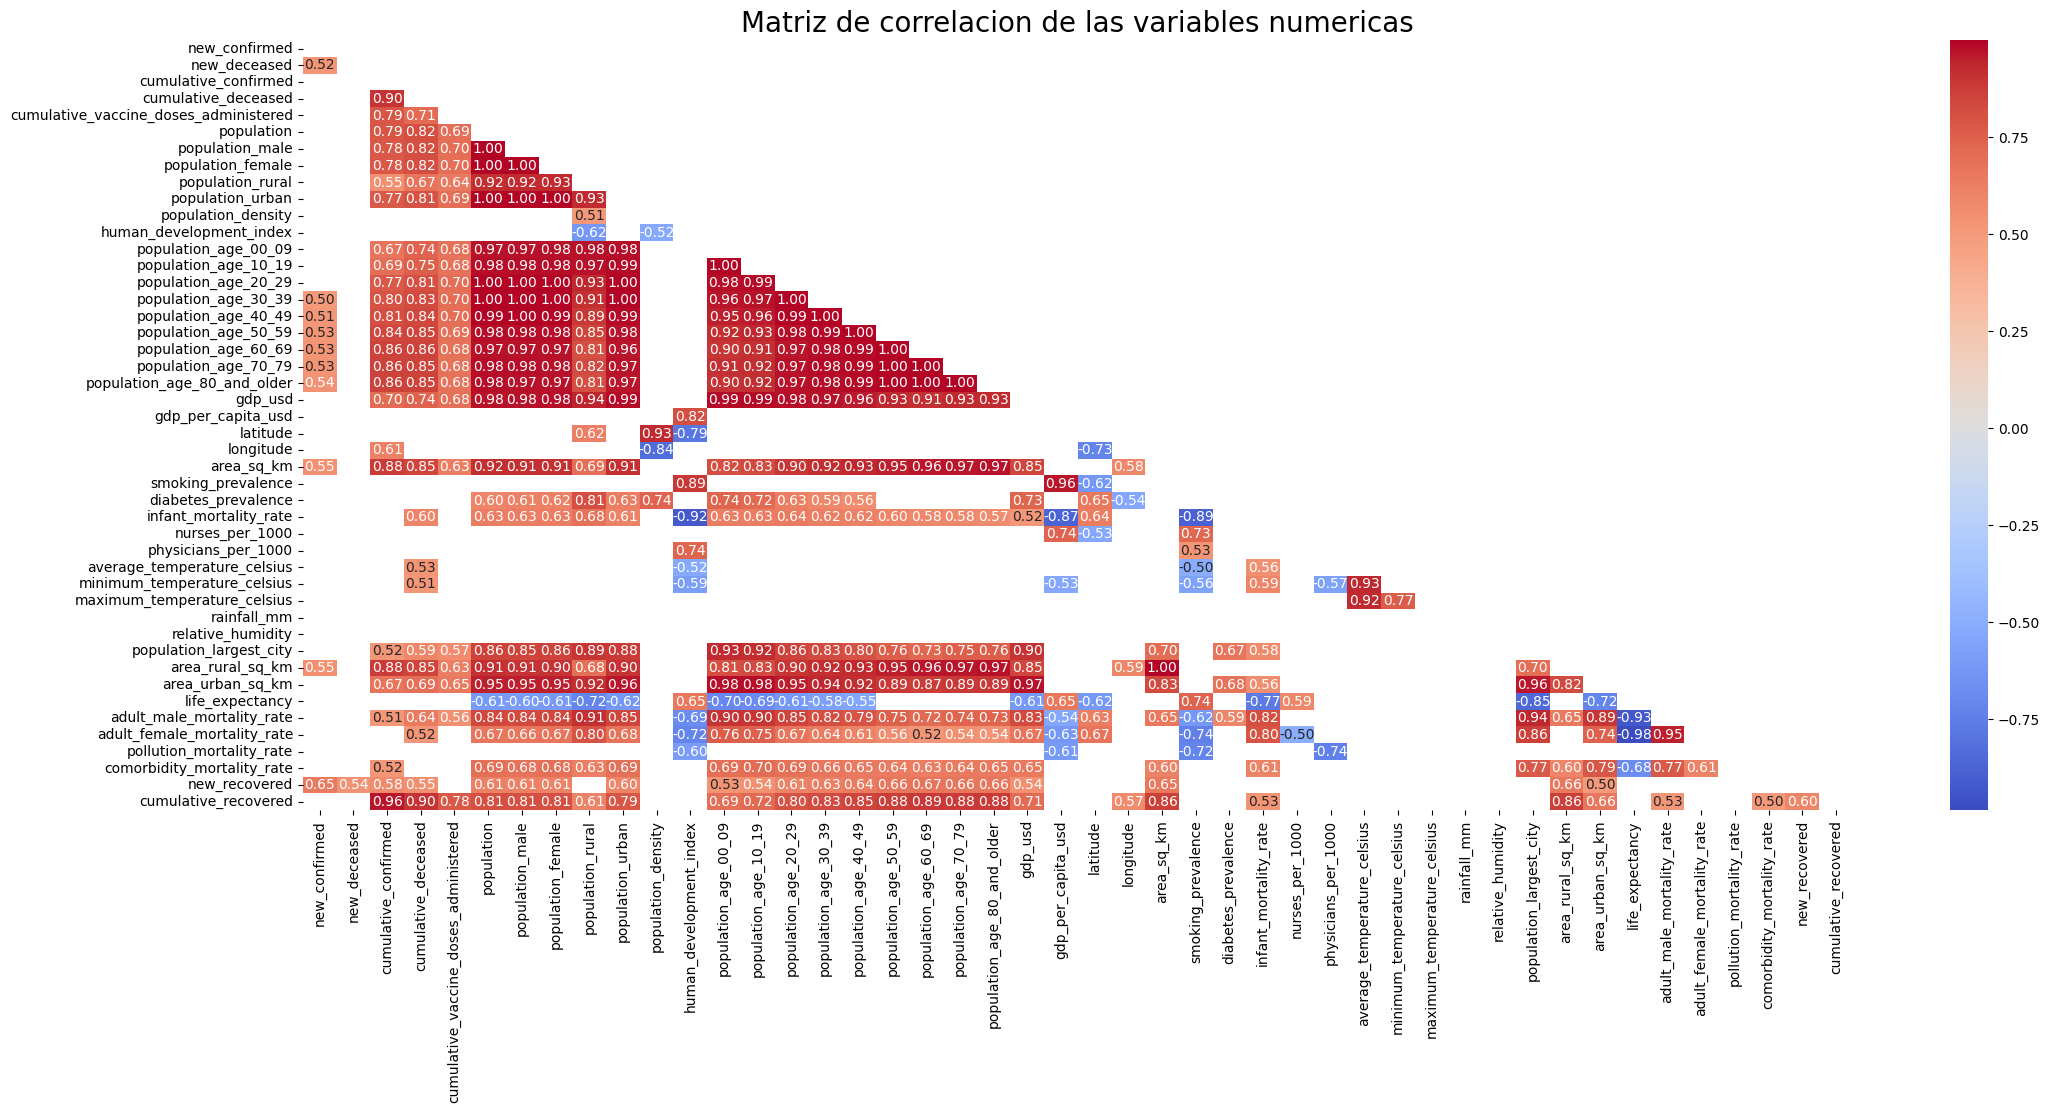

In [46]:
# Se crea la matriz de correlacion de las variables numericas
numeric_columns = data_filtrada.select_dtypes(include=['float64','int64']).columns
correlation_matrix = data_filtrada[numeric_columns].corr()
# Aqui se crea una mascara para el triangulo superior
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
# Vamos a mostrar valores superiores a 0.5 en terminos absolutos para denotar las correlaciones siginificativas
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]
# Se crea la grafica
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Matriz de correlacion de las variables numericas', fontsize=20)
plt.show


### Graficos

#### Gráfico de Barras por columnas numéricas

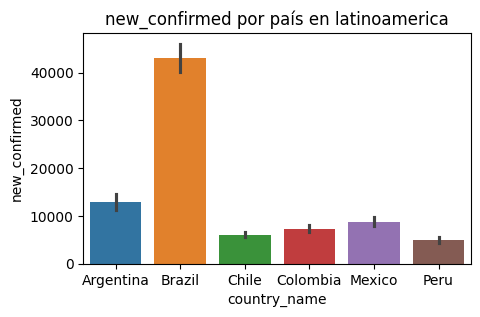

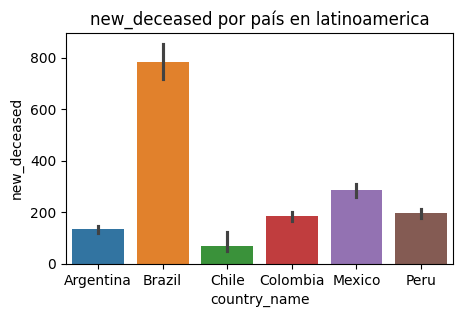

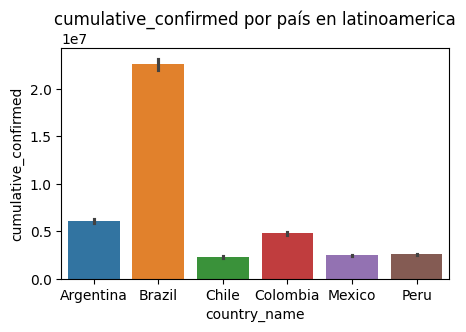

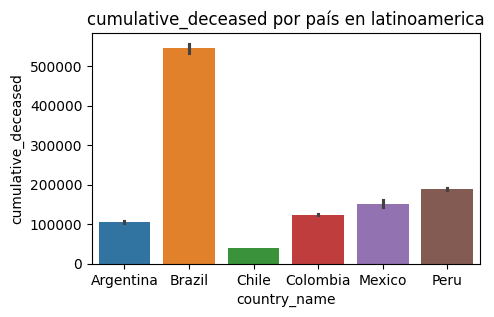

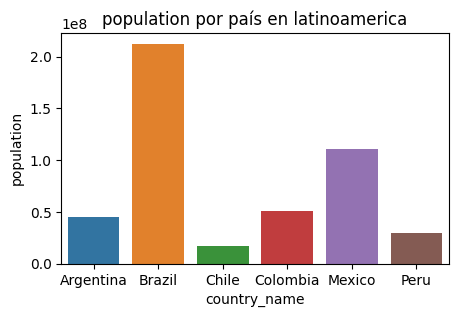

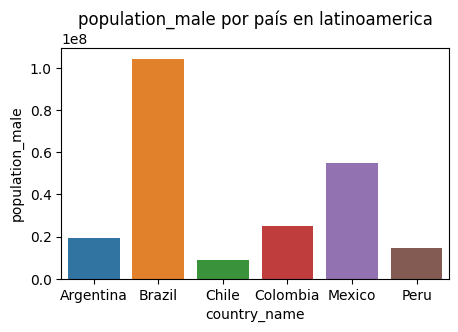

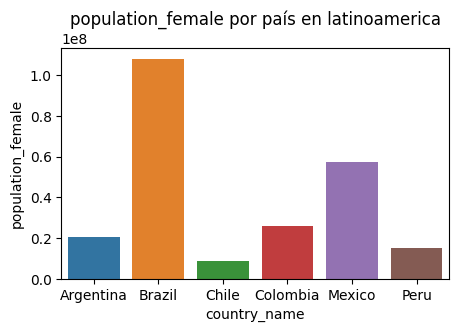

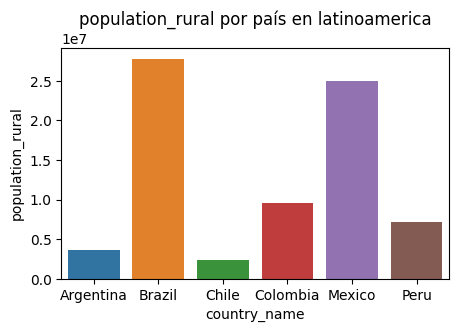

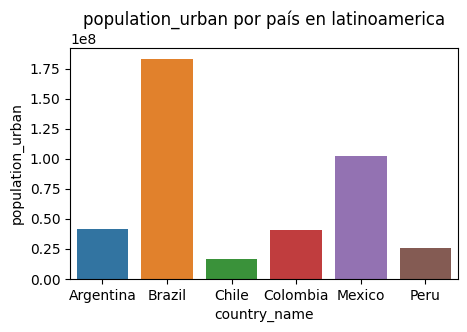

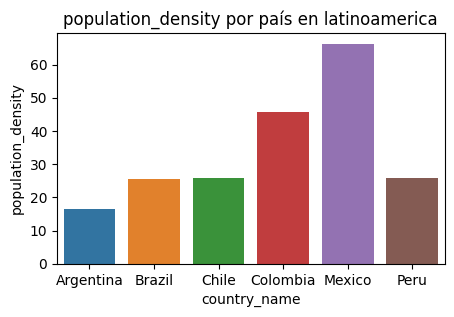

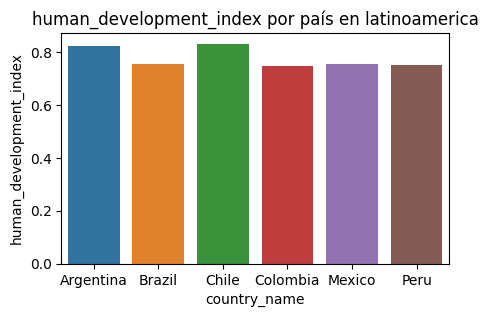

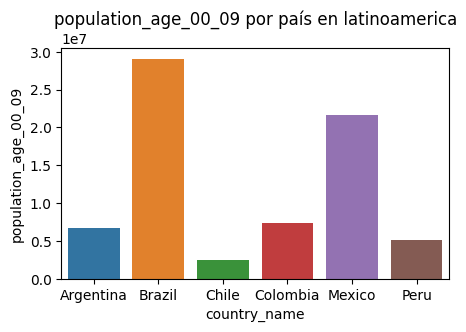

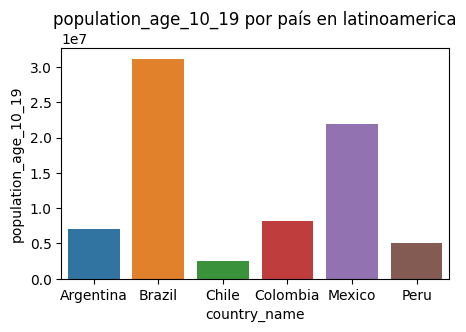

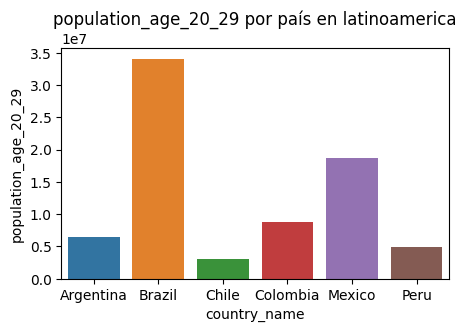

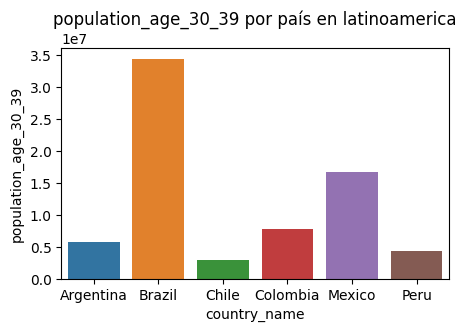

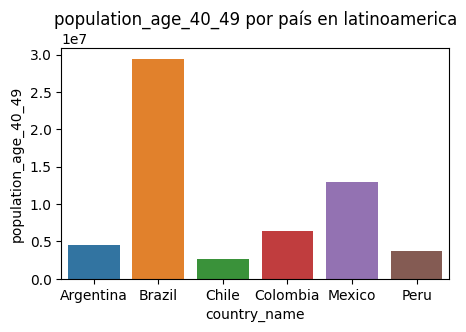

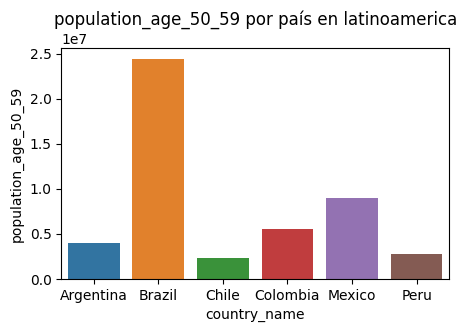

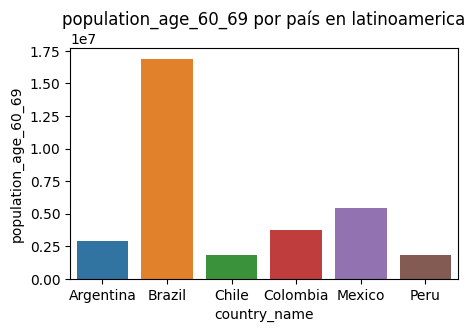

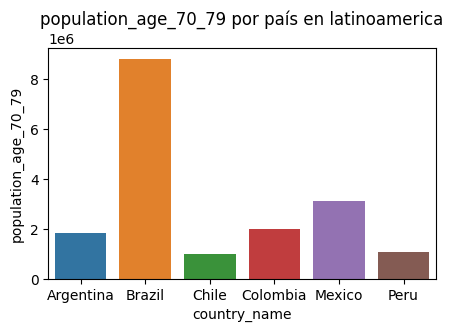

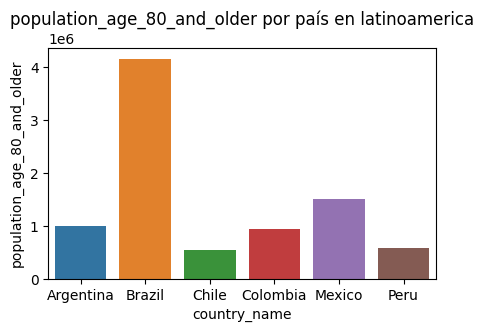

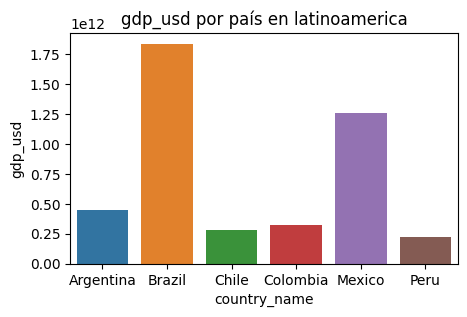

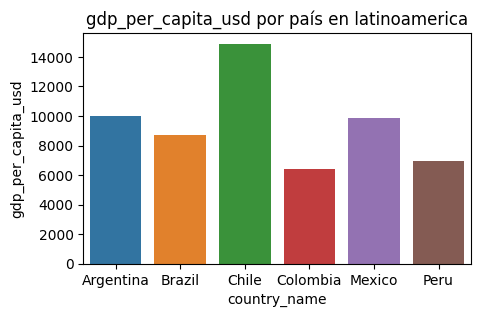

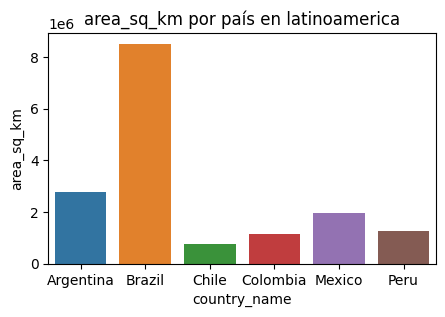

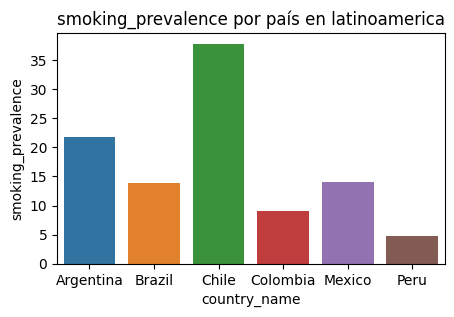

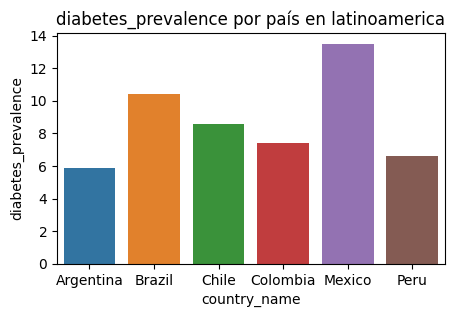

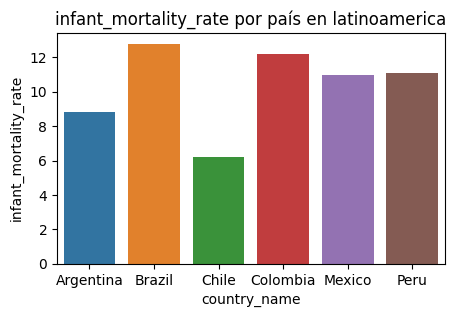

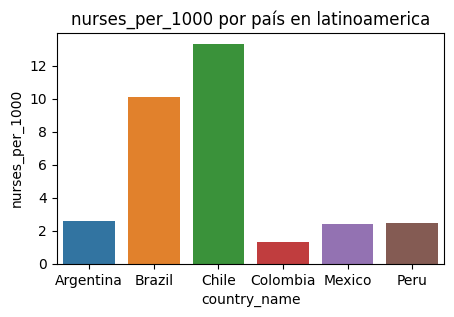

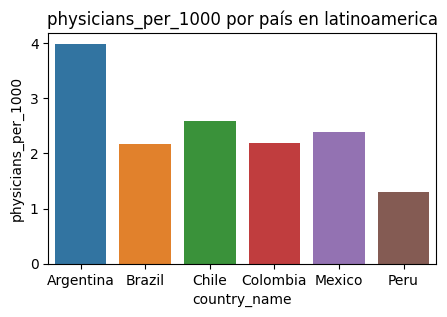

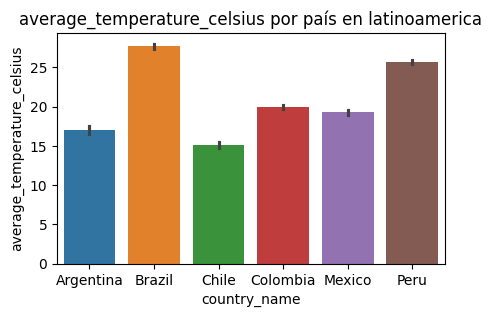

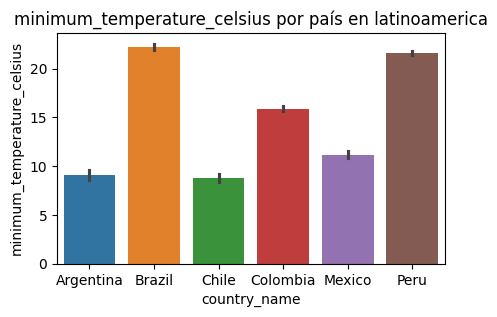

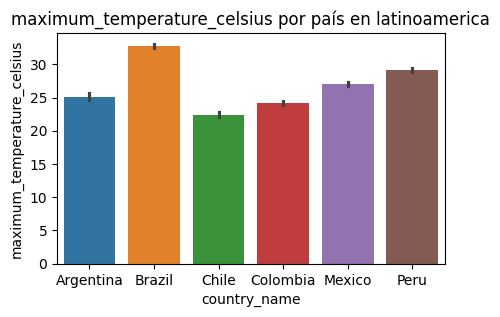

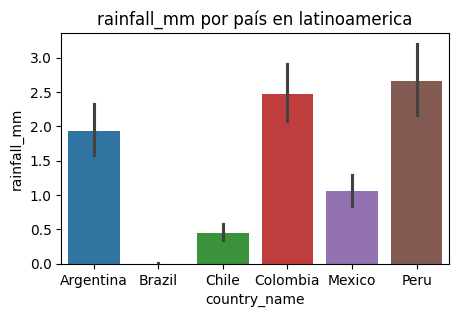

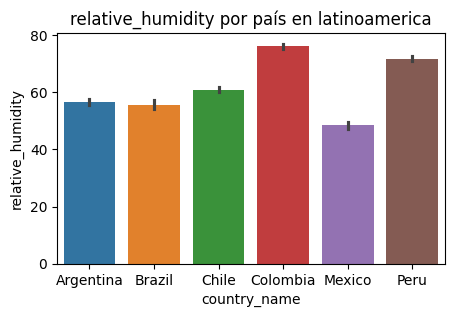

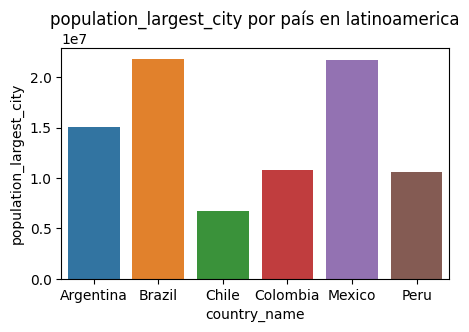

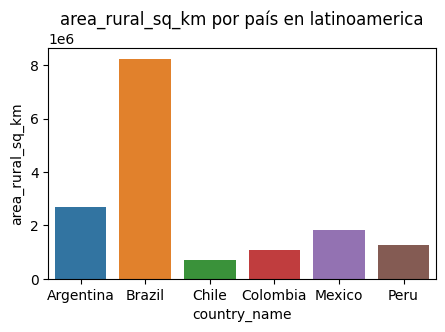

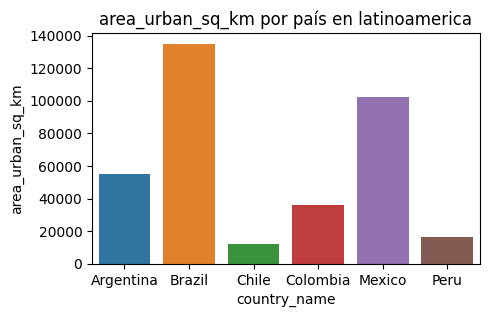

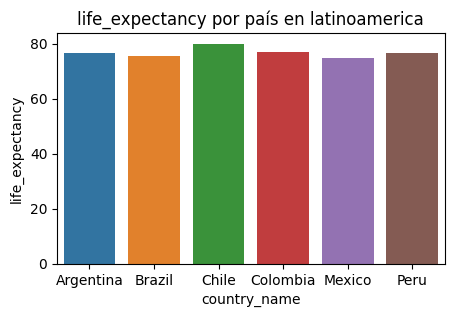

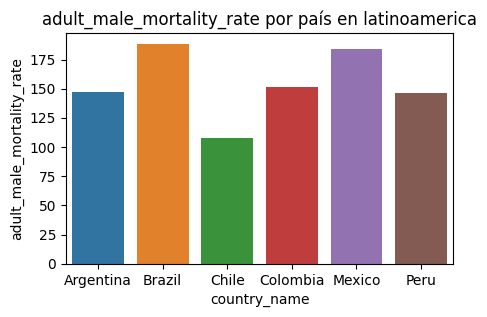

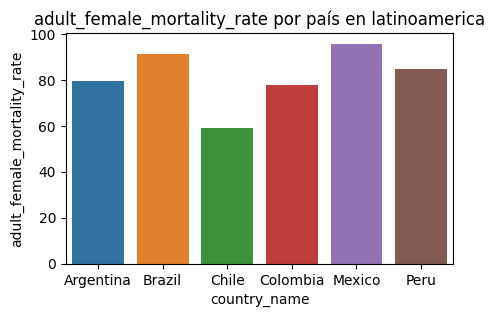

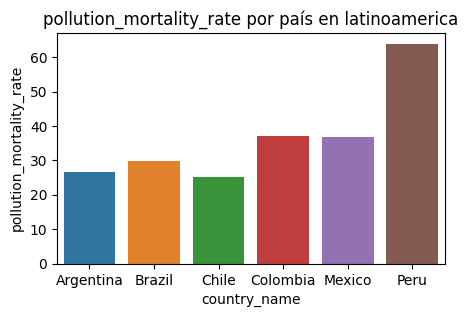

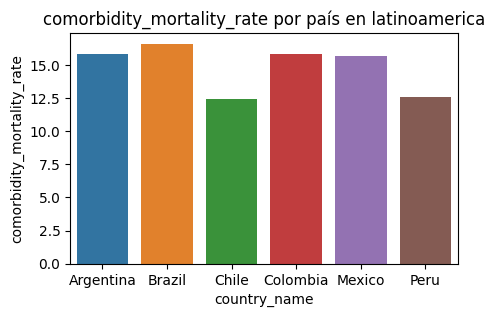

In [47]:
for i in data_filtrada.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude'
                 ,'comulative_confirmed','comulative_deceased','cumulative_recovered',
                 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5,3))
        sns.barplot(x='country_name', y=i, data=data_filtrada,ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show() 

### Gráfica Scatterplot de average_temperature_celsius vs new_confirmed 

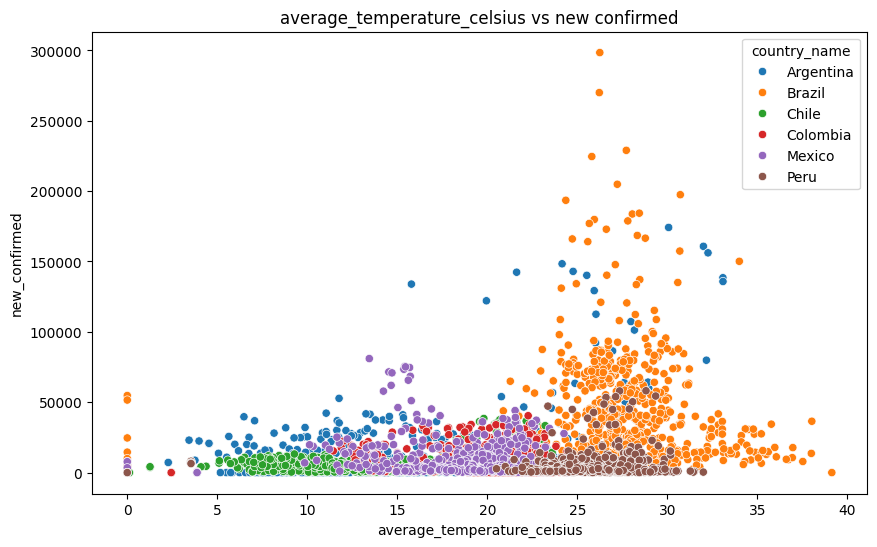

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed',data=data_filtrada, hue='country_name')
plt.title('average_temperature_celsius vs new confirmed')
plt.show()

Vemos que mientras mayor es la temperatura se presenta un número mayor de casos nuevos confirmados, sin embargo esto puede deberse a la gran poblacion de Brasil.

### Histogramas de variables numericas

In [49]:
numeric_cols = data_filtrada.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)



['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_ra

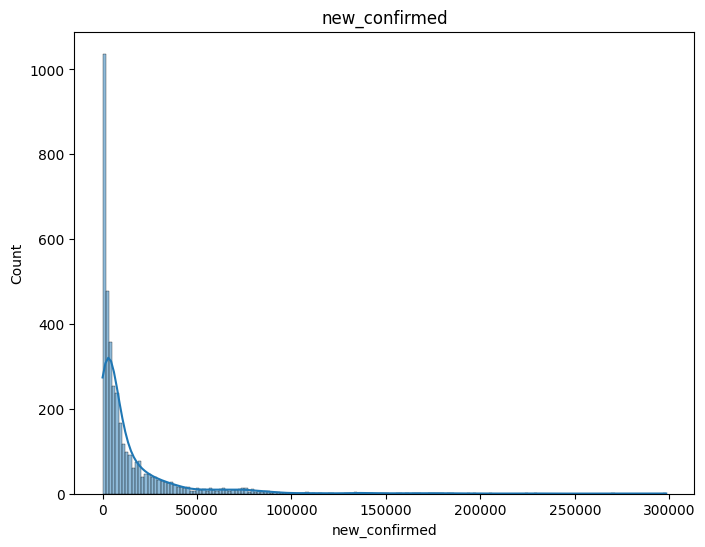

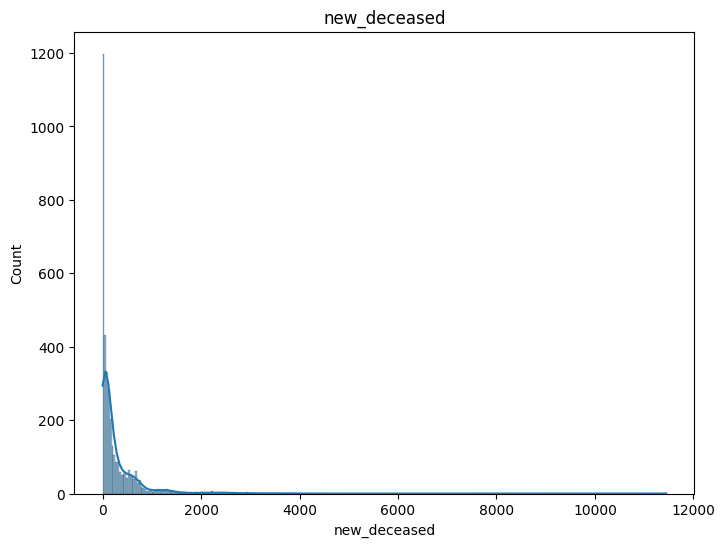

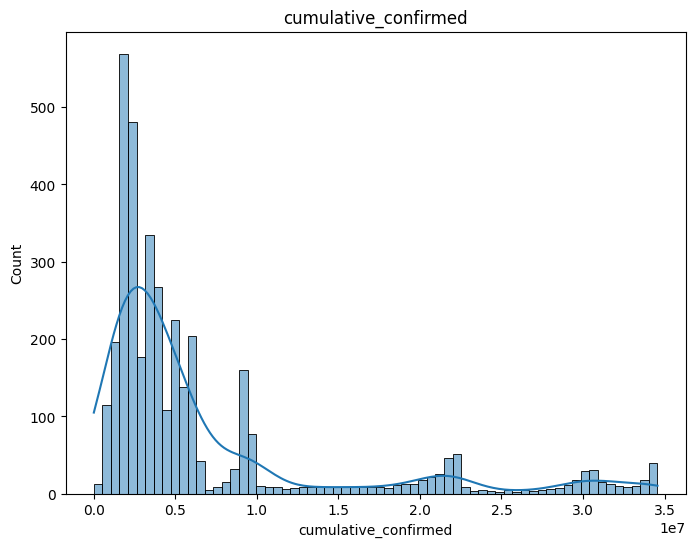

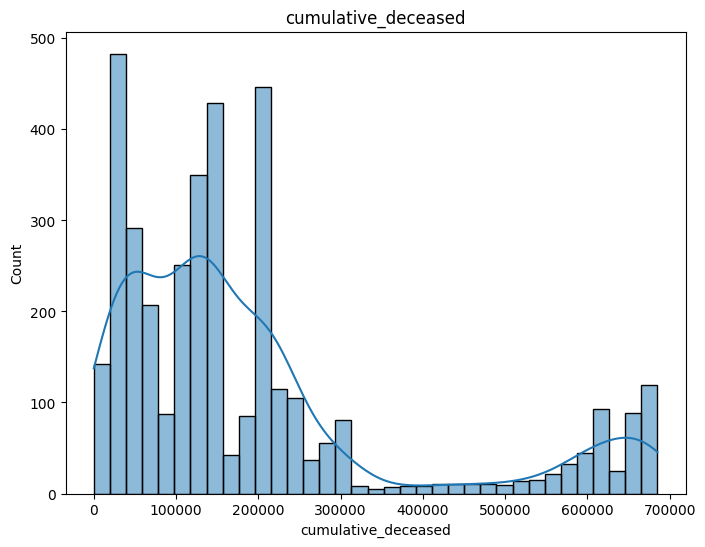

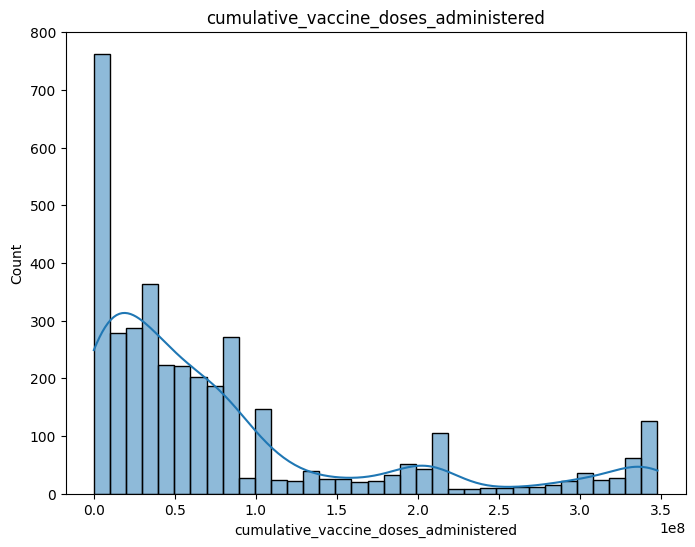

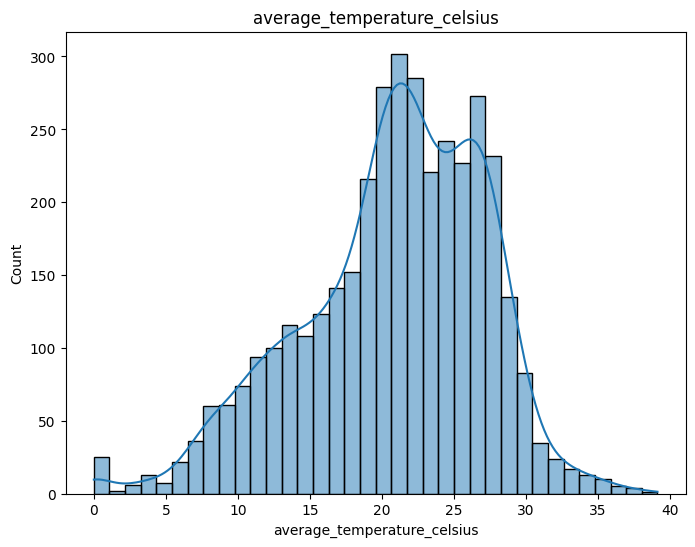

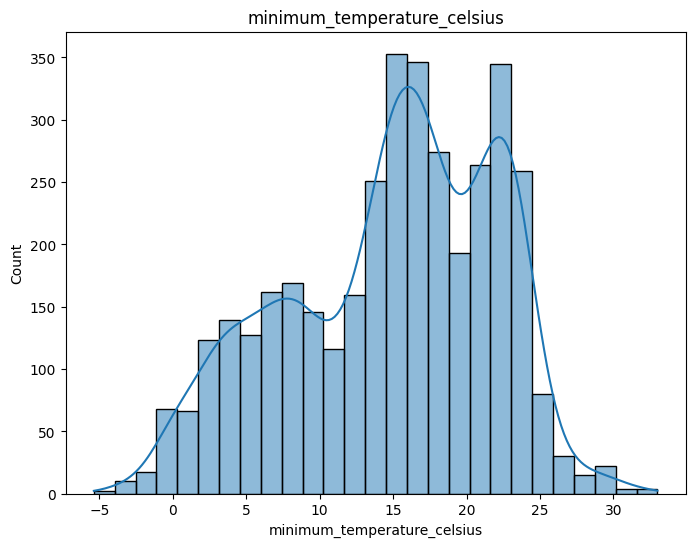

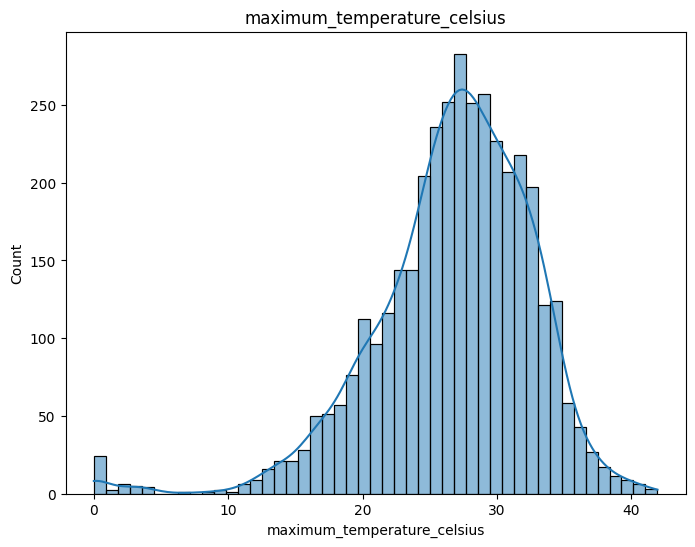

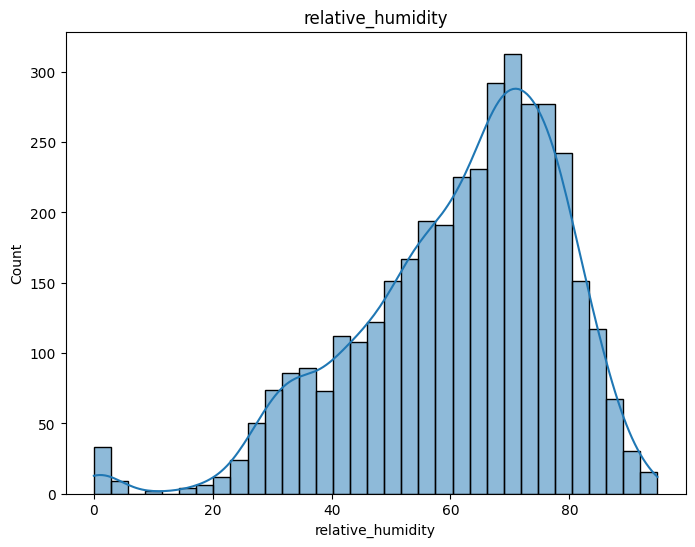

In [50]:
lista_columnas_in = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
                     'cumulative_vaccine_doses_administered', 'average_temperature_celsius',
                     'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']

# Creamos histogramas de las variabels numericas

for i in data_filtrada[lista_columnas_in]:
    
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_filtrada[i], kde=True)
    plt.title(i)
    plt.show()


In [51]:
#print(data_filtrada.index)


### Gráfica Scatterplot average_temperature_celsius vs new deceased

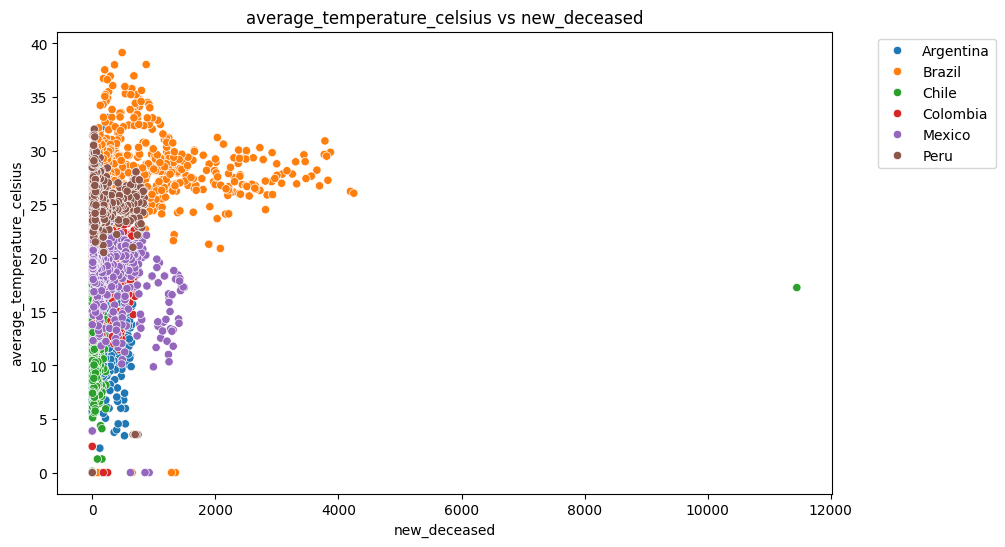

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_filtrada, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Gráfica de la Evolución de las dosis administradas

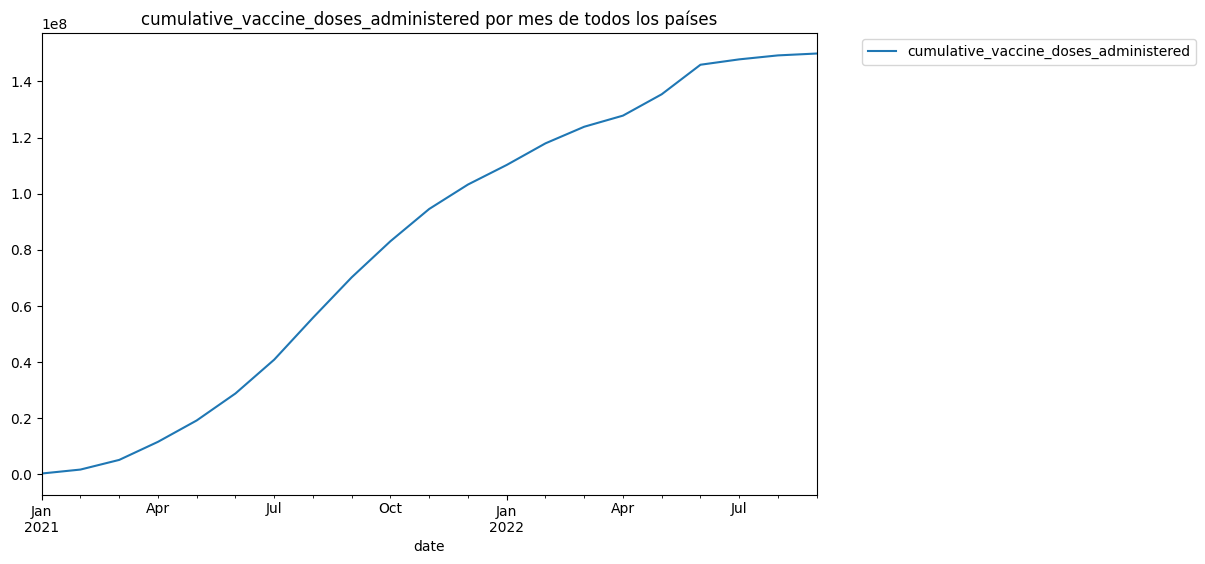

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
data_filtrada.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los países')
plt.show()

En este gráfito podemos como progresimente hubo un aumento en las dosis administradas, sin embargo hay que tener en cuenta que este gráfico es general y no por país


### Gráficas de Evolución de dosis administradas por mes de cada país

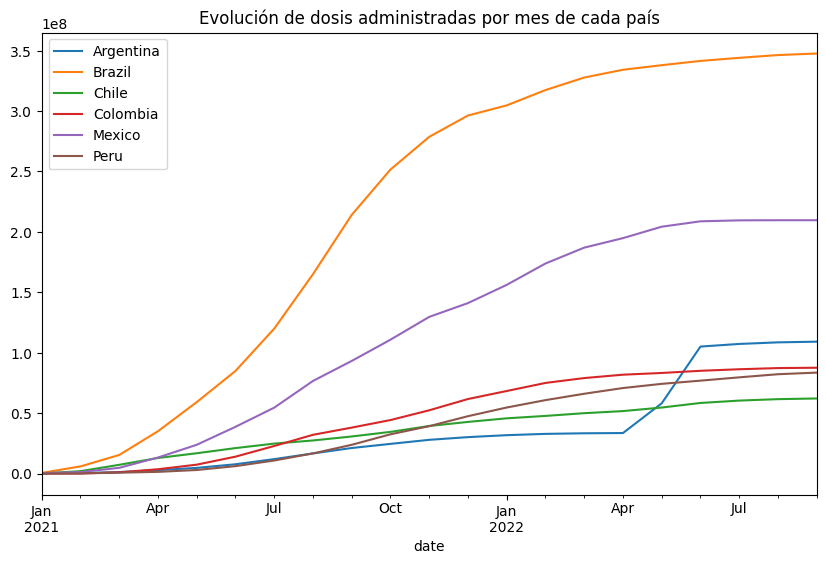

In [54]:
lista_paises = list(data_filtrada['country_name'].unique())

fig, ax = plt.subplots(figsize=(10, 6))

for pais in lista_paises:
    data_filtrada[data_filtrada['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(lista_paises)
plt.show()


Realizando un analisis mas detallado de las dosis administradas por mes por país podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad de dosis ha ido estancandose. Esto puede ser debido a muchos factores.

### Grafico Decesos por mes por cada país 

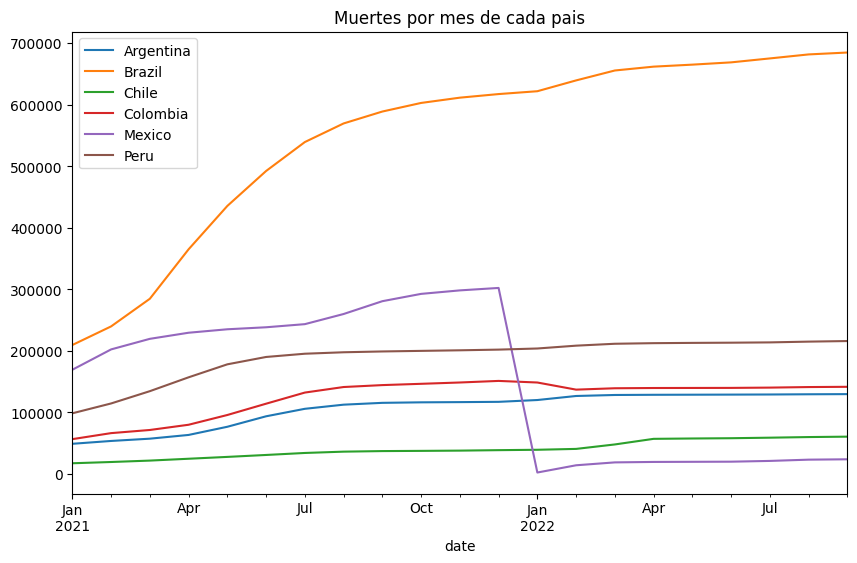

In [55]:
lista_paises = list(data_filtrada['country_name'].unique())

fig, ax = plt.subplots(figsize=(10, 6))

for pais in lista_paises:
    data_filtrada[data_filtrada['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(lista_paises)
plt.show()

El pais qeu mas muertas ha tenido es brasil, seguido de mexico colombia peru y chile
sin embargo, estono quiere decir que estos paises sean lo que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada pais ademas de otros factores y cantidad de datoa que tenemos 
la disminucion de casos en mexico puede ser una perdida de datos o una disminucion real de los casos, esto se puede analizar en un estudio posterior

El país que presenta mas muertos es Brasil, seguido de Mexico, colombia, Perú y Chile, pero esto no significa necesarimente que sean de los que peor hayan manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes entre otros factores.


### Gráfica Casos Confirmados por mes de cada País

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\212490623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada[data_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\212490623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada[data_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\212490623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_filtrada[data_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\212490623.py:5: FutureWarning: 'M' is deprecated and will be removed in a

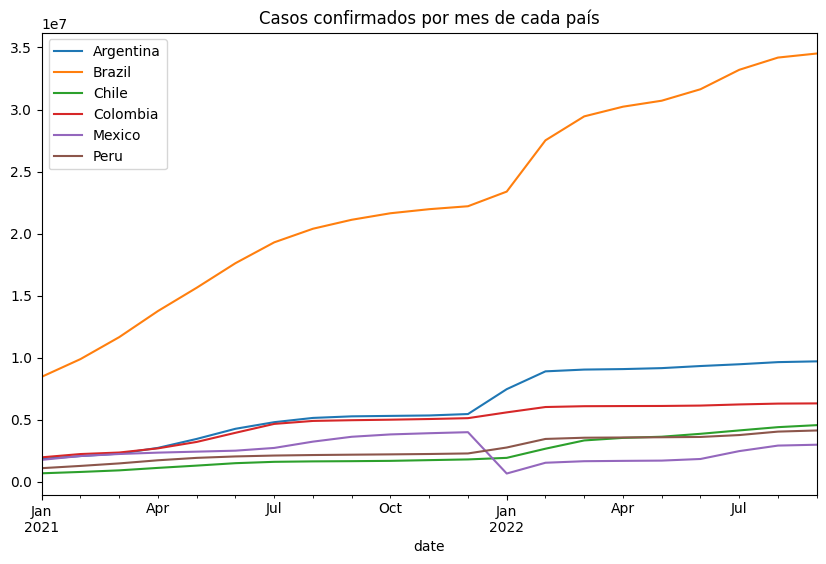

In [56]:
lista_paises = list(data_filtrada['country_name'].unique())

fig, ax = plt.subplots(figsize=(10, 6))
for pais in lista_paises:
    data_filtrada[data_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(lista_paises)
plt.show()

### Gráfico comparacion del numero de nuevos casos confirmados entre paises de america latina

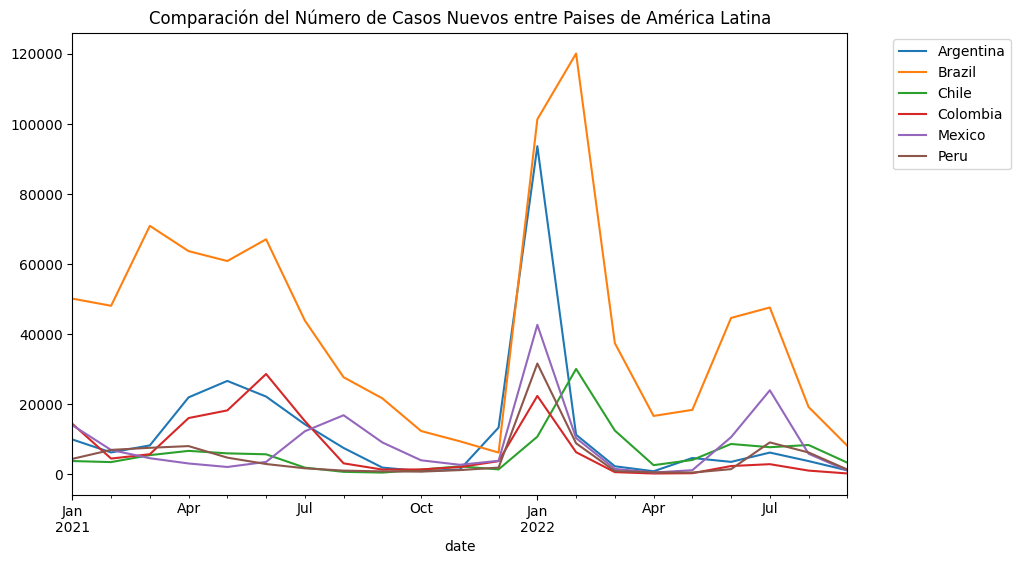

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in lista_paises:
    country_data = data_filtrada[data_filtrada['country_name'] == pais]
    if not country_data.empty:
        country_data.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax, label=pais)

# Título y leyenda
plt.title("Comparación del Número de Casos Nuevos entre Paises de América Latina")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Grafico de la Evolucion de las dosis acumuladas por pais 

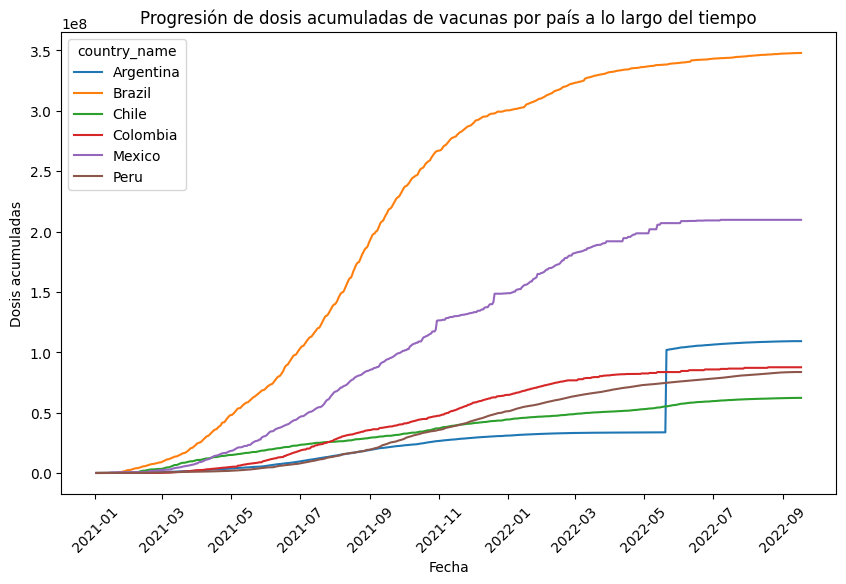

In [58]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data_filtrada,
    x='date',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    
    
)

# Añadir un título y etiquetas
plt.title("Progresión de dosis acumuladas de vacunas por país a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Dosis acumuladas")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

### Gráfico Boxplot de las temperaturas por pais 

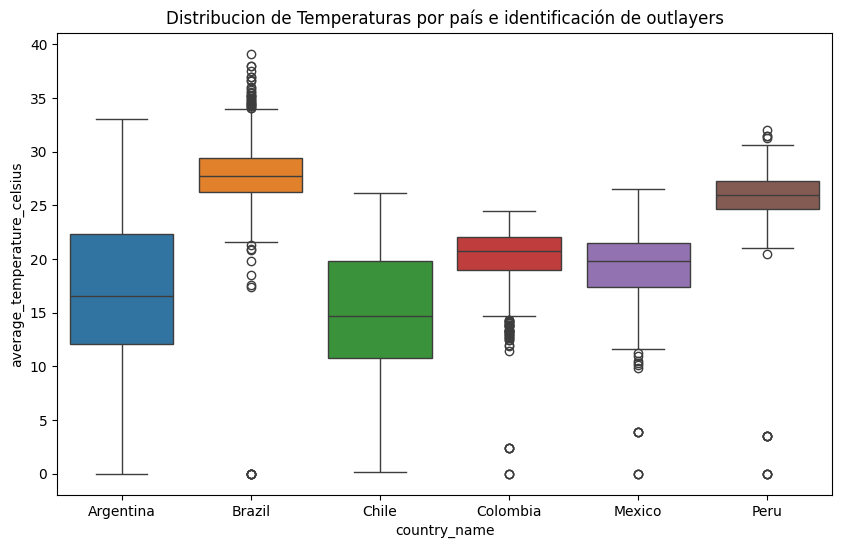

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name',y='average_temperature_celsius', data=data_filtrada, hue='country_name')
plt.title('Distribucion de Temperaturas por país e identificación de outlayers')
plt.show()

### Gráfico de la Evolución de los Casos Recuparados 

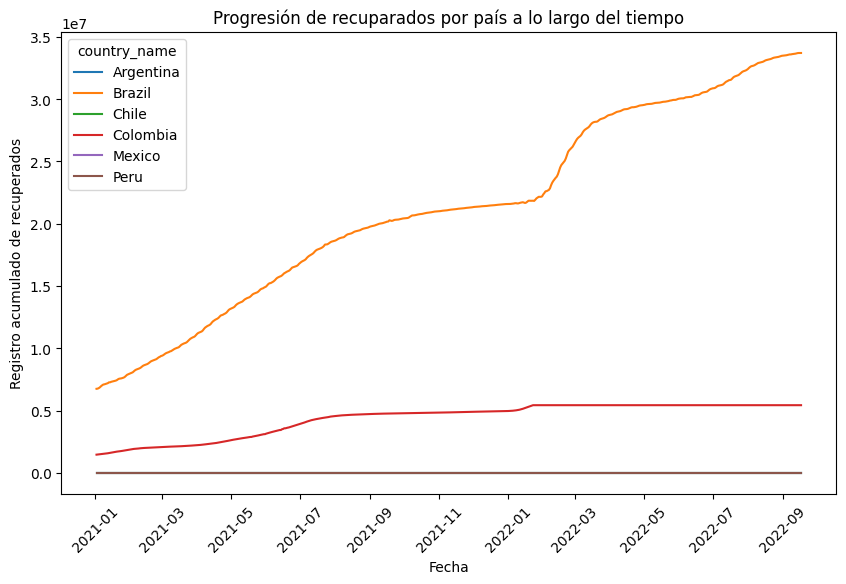

In [60]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data_filtrada,
    x='date',
    y='cumulative_recovered',
    hue='country_name',
    
    
)

# Añadir un título y etiquetas
plt.title("Progresión de recuparados por país a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Registro acumulado de recuperados")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

### Gráfico de la Distribucion de la Poblacion por grupos etarios por pais

In [3]:

# Lista de columnas que contienen los grupos de edad
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Lista de países únicos
lista_paises = list(data_filtrada['country_name'].unique())

# Configuración de Seaborn para mejorar la estética
sns.set(style="whitegrid")

# Iteramos sobre cada país
for pais in lista_paises:
    # Filtramos los datos por país y calculamos la media de la población para cada grupo de edad
    age_distribution = data_filtrada[data_filtrada['country_name'] == pais][age_columns].mean()
    

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="viridis")

    # Configurar las etiquetas de los ejes y el título
    plt.xlabel('Grupos de Edad')
    plt.ylabel('Población Media')
    plt.title(f'Distribución de la Población por Grupos de Edad en {pais}')

    # Ajustar las etiquetas del eje x
    plt.xticks(range(len(age_columns)), 
               ['0-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'], 
               rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

NameError: name 'data_filtrada' is not defined

### Gráfico por mes de cada pais de vacunacion por grupo etario

In [62]:
# grupos etarios 

data_grupos_etarios = data_filtrada



data_grupos_etarios['population_age_00_19'] = data_grupos_etarios['population_age_00_09'] + data_grupos_etarios['population_age_10_19']
data_grupos_etarios['population_age_20_39'] = data_grupos_etarios['population_age_20_29'] + data_grupos_etarios['population_age_30_39']
data_grupos_etarios['population_age_40_59'] = data_grupos_etarios['population_age_40_49'] + data_grupos_etarios['population_age_50_59']
data_grupos_etarios['population_age_60_79'] = data_grupos_etarios['population_age_60_69'] + data_grupos_etarios['population_age_70_79']
data_grupos_etarios['population_age_80_and_older'] = data_grupos_etarios['population_age_80_and_older']

data_grupos_etarios['population_age_00_19_vacunados'] = data_grupos_etarios['cumulative_vaccine_doses_administered'] * (data_grupos_etarios ['population_age_00_19']/data_grupos_etarios['population'])
data_grupos_etarios['population_age_20_39_vacunados'] = data_grupos_etarios['cumulative_vaccine_doses_administered'] * (data_grupos_etarios ['population_age_20_39']/data_grupos_etarios['population'])
data_grupos_etarios['population_age_40_59_vacunados'] = data_grupos_etarios['cumulative_vaccine_doses_administered'] * (data_grupos_etarios ['population_age_40_59']/data_grupos_etarios['population'])
data_grupos_etarios['population_age_60_79_vacunados'] = data_grupos_etarios['cumulative_vaccine_doses_administered'] * (data_grupos_etarios ['population_age_60_79']/data_grupos_etarios['population'])
data_grupos_etarios['population_age_80_and_older_vacunados'] = data_grupos_etarios['cumulative_vaccine_doses_administered'] * (data_grupos_etarios ['population_age_80_and_older']/data_grupos_etarios['population'])

lista_columnas_vacunados_grupos_etarios = ['population_age_00_19_vacunados','population_age_20_39_vacunados','population_age_40_59_vacunados','population_age_60_79_vacunados','population_age_80_and_older_vacunados']

for columna in lista_columnas_vacunados_grupos_etarios:

    data_grupos_etarios[columna].fillna(0)
    data_grupos_etarios[columna].astype(int)









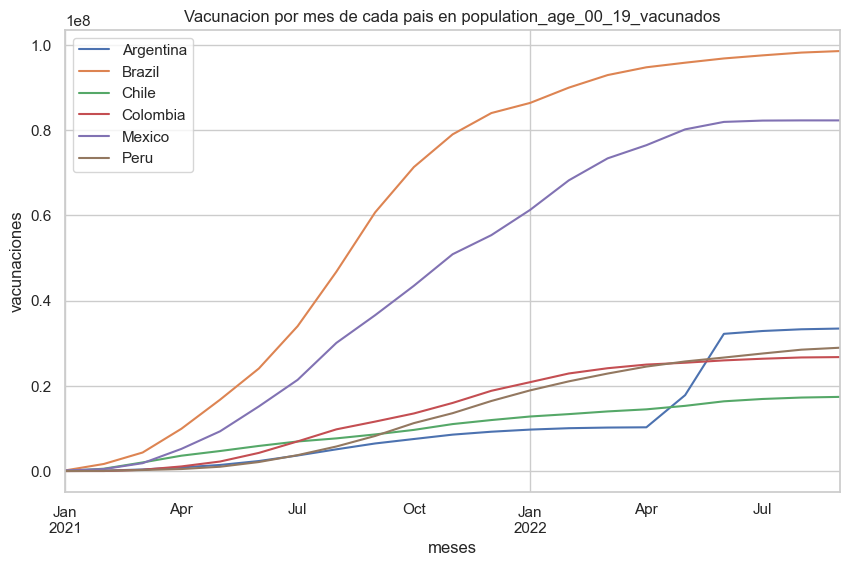

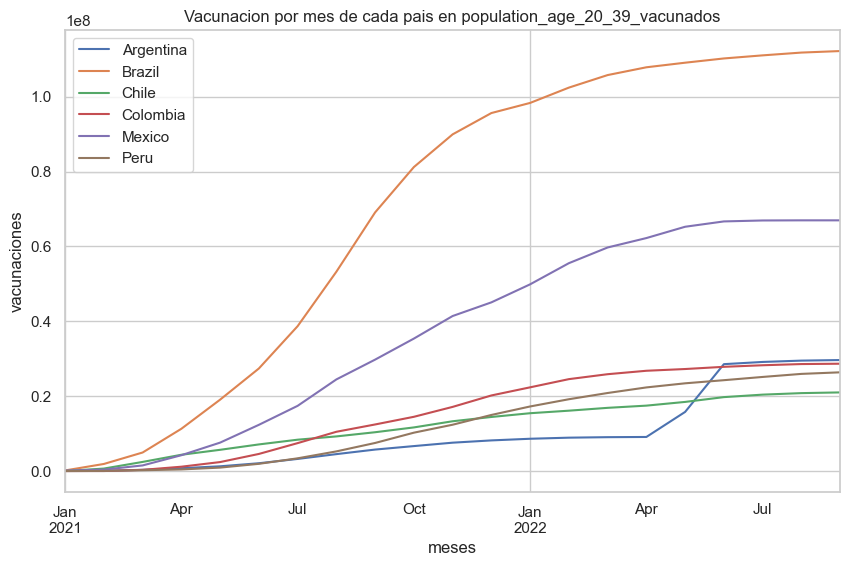

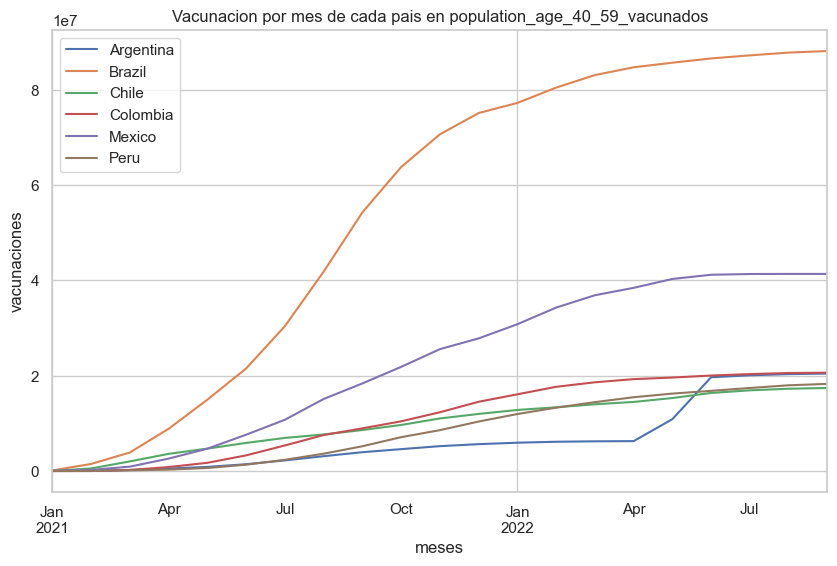

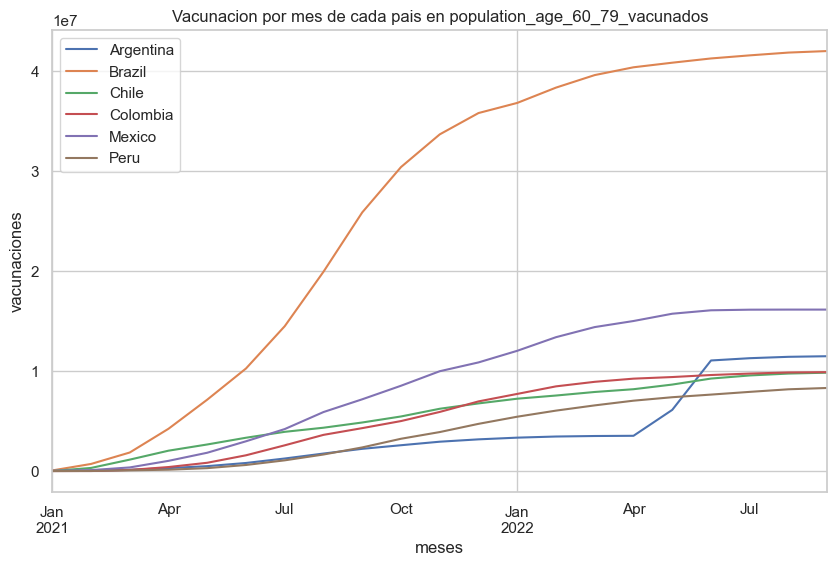

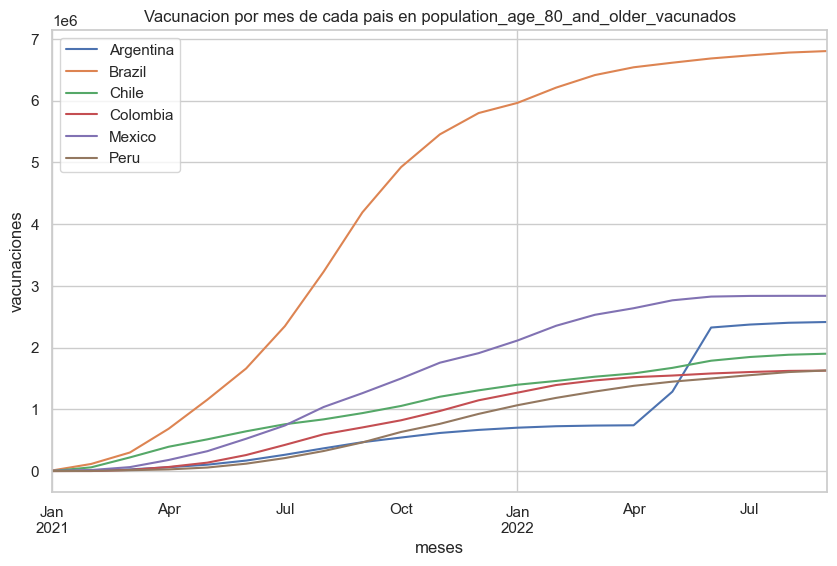

In [63]:
lista_paises = list(data_filtrada['country_name'].unique())

lista_columnas_etarias = ['population_age_00_19_vacunados','population_age_20_39_vacunados','population_age_40_59_vacunados','population_age_60_79_vacunados','population_age_80_and_older_vacunados']

for columna in lista_columnas_etarias:
    fig, ax = plt.subplots(figsize=(10, 6))
    for pais in lista_paises:
        data_grupos_etarios[data_grupos_etarios['country_name']==pais].resample('ME').mean(numeric_only=True)[columna].plot()
    plt.title(f'Vacunacion por mes de cada pais en {columna}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(lista_paises)
    plt.xlabel('meses')
    plt.ylabel('vacunaciones')
    plt.show()
    










### Gráfica de la Evolucion de nuevos confirmados  a traves de las semanas/año del Año

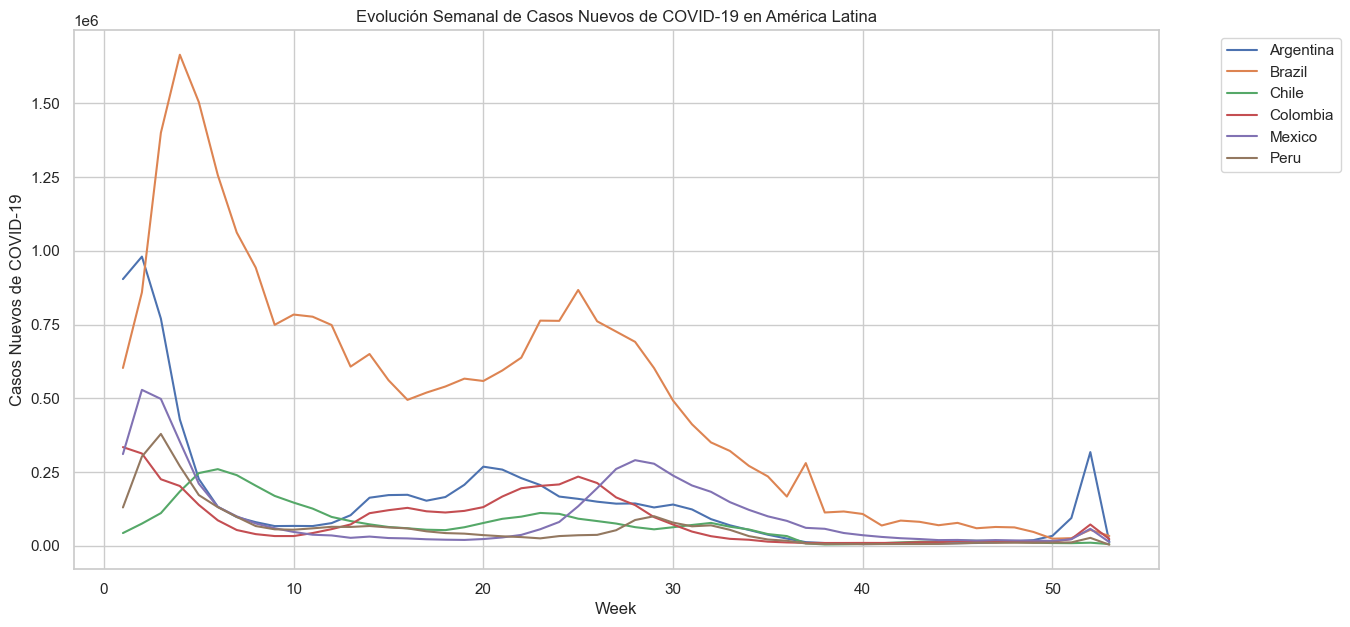

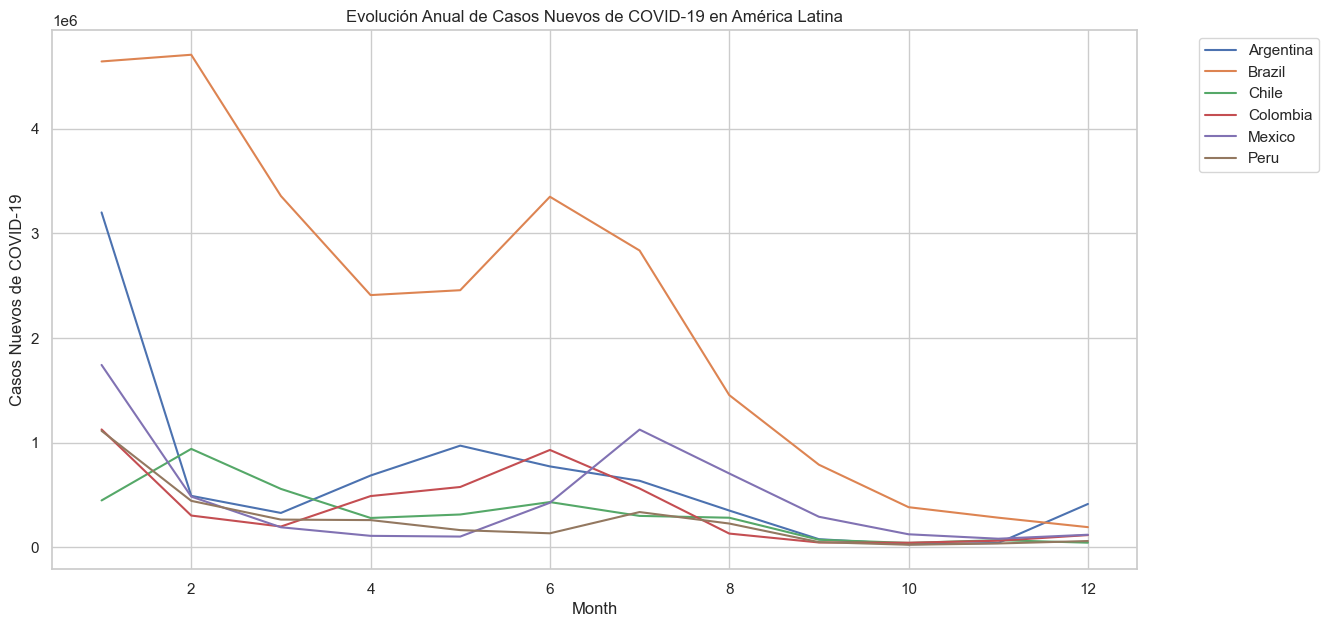

In [64]:

# Copia y transformación inicial de los datos
data_evolucion_semanal = data_filtrada.copy()
data_evolucion_semanal['week'] = data_filtrada.index.isocalendar().week
data_evolucion_semanal['year'] = data_filtrada.index.isocalendar().year

def plot_cases(data, time_col, ylabel, title):
    """
    Function to plot COVID-19 cases.
    
    Parameters:
    data (DataFrame): DataFrame with the data to plot
    time_col (str): Column name representing time (e.g., 'week' or 'month')
    ylabel (str): Label for the y-axis
    title (str): Title of the plot
    """
    plt.figure(figsize=(14, 7))
    for country in data['country_name'].unique():
        country_cases = data[data['country_name'] == country]
        plt.plot(country_cases[time_col], country_cases['new_confirmed'], label=country)
    
    plt.xlabel(time_col.capitalize())
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot semanal
weekly_cases = data_evolucion_semanal.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plot_cases(weekly_cases, 'week', 'Casos Nuevos de COVID-19', 'Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')

# Añadir columna 'month' para la evolución anual
data_evolucion_semanal['month'] = data_evolucion_semanal.index.month
yearly_cases = data_evolucion_semanal.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plot_cases(yearly_cases, 'month', 'Casos Nuevos de COVID-19', 'Evolución Anual de Casos Nuevos de COVID-19 en América Latina')


Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que mas ha causado muertes en los paises seleccionados, seguido de fumar.

como conclusion de este avance podemos decir que los paises que mas necesitan ayuda son brasil, mexico y colombia, ya que son los paises que mas casos confirmados y muertes han tenido, ademas de ser los paises que menos vacunados han administrado.

las enfermedades preexistentes que mas han afectado a la poblacion en los paises seleccionadosson el fumar y la diabetes, por loq ue podria sevir que estas enfermedades son las que mas han causado muertes en los paises seleccionados( aclarar que esto no quiere decir que sean las unicas enfermedades que han causado muertes sino que son las mas comunes y de las que tenemos datos)

### Comparacion de la Prevalencia de fumadores en la Poblacion y la Tasa de Mortalidad por país

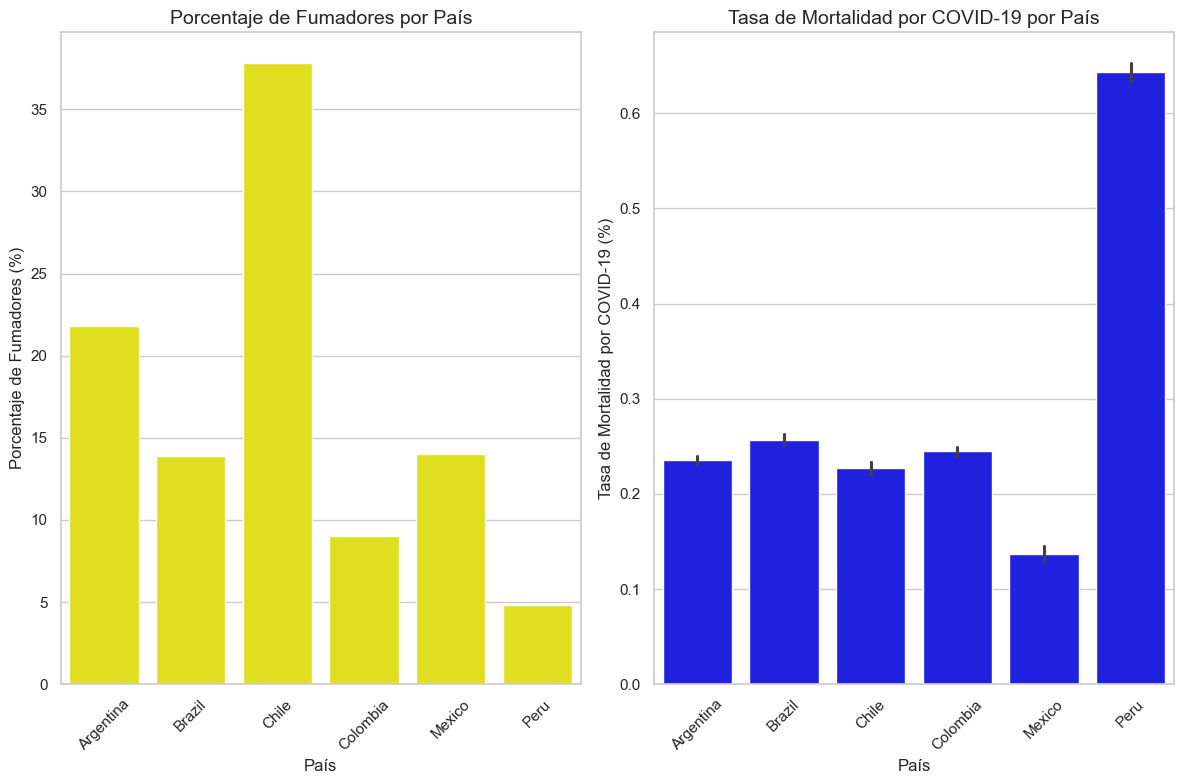

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(
    data=data_filtrada, 
    x='country_name', 
    y='smoking_prevalence', 
    ax=ax1, 
    color='yellow'
)
ax1.set_title('Porcentaje de Fumadores por País', fontsize=14)
ax1.set_xlabel('País', fontsize=12)
ax1.set_ylabel('Porcentaje de Fumadores (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

sns.barplot(
    data=data_filtrada, 
    x='country_name', 
    y=data_filtrada['cumulative_deceased'] / data_filtrada['population']*100, 
    ax=ax2, 
    color='blue'
)
ax2.set_title('Tasa de Mortalidad por COVID-19 por País', fontsize=14)
ax2.set_xlabel('País', fontsize=12)
ax2.set_ylabel('Tasa de Mortalidad por COVID-19 (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Comparacion de la Prevalencia de Diabetes en la Poblacion y la Tasa de Mortalidad por país

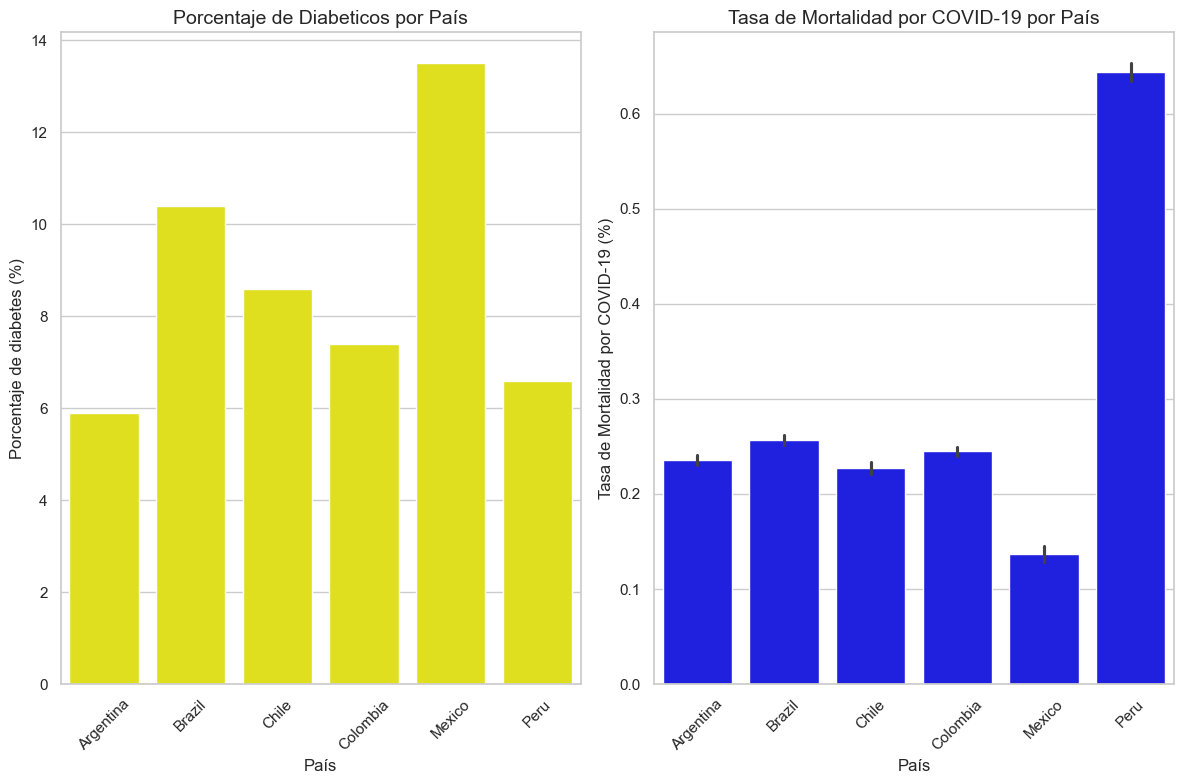

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(
    data=data_filtrada, 
    x='country_name', 
    y='diabetes_prevalence', 
    ax=ax1, 
    color='yellow'
)
ax1.set_title('Porcentaje de Diabeticos por País', fontsize=14)
ax1.set_xlabel('País', fontsize=12)
ax1.set_ylabel('Porcentaje de diabetes (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

sns.barplot(
    data=data_filtrada, 
    x='country_name', 
    y=data_filtrada['cumulative_deceased'] / data_filtrada['population']*100, 
    ax=ax2, 
    color='blue'
)
ax2.set_title('Tasa de Mortalidad por COVID-19 por País', fontsize=14)
ax2.set_xlabel('País', fontsize=12)
ax2.set_ylabel('Tasa de Mortalidad por COVID-19 (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Como podemos ver Perú fue uno de los países más afectados por la pandemia, presentando altos niveles de decesos con respecto a su poblacion, sin embargo no parece haber una correlacion entre la diabetes y el tabaquismo con estas muertes.

# Avance 3


Como primera aproximacion vamos a realizar un analisisi del 

### Progreso de la Vacunacion por población

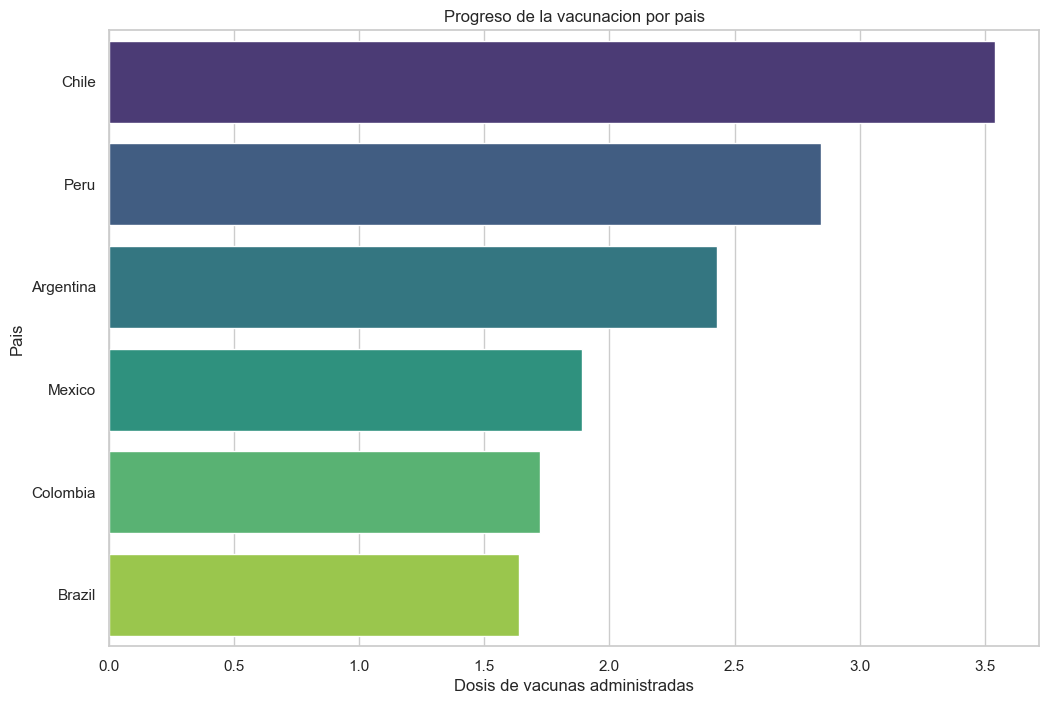

In [67]:

data = data_filtrada.copy()

# Calcular los casos activos
data['dpp'] = data['cumulative_vaccine_doses_administered'] / data['population'] 


vaccination_data = data.groupby('country_name')['dpp'].max().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index,hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunacion por pais')
plt.show()




### Evolución de Casos Activos vs. Recuperados, general y por pais

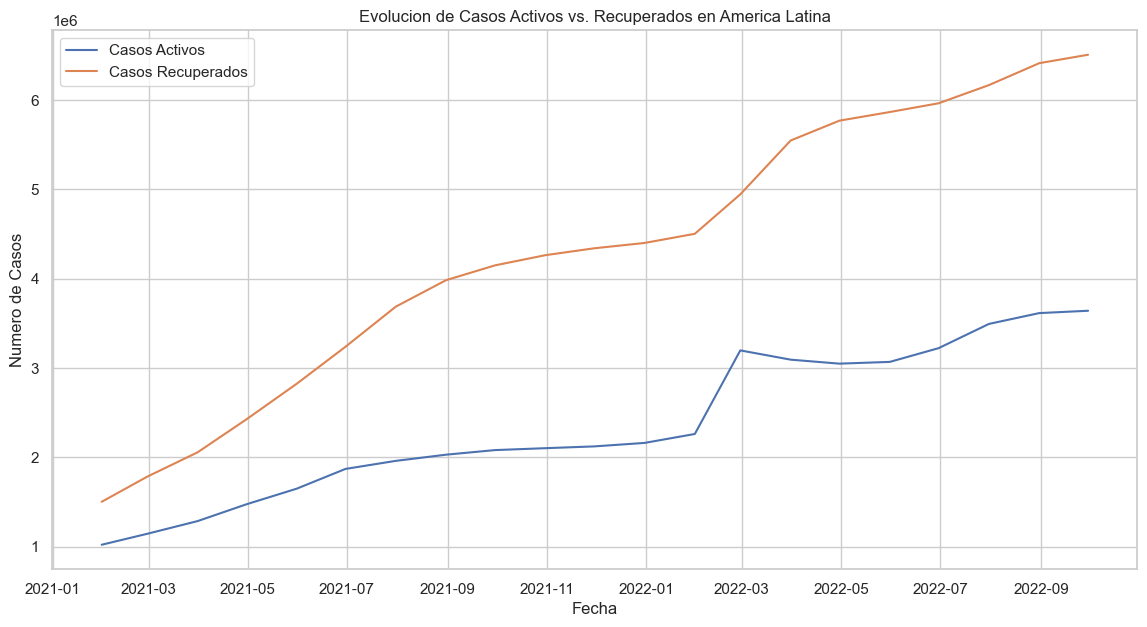

In [68]:
data= data_filtrada.copy()

data['active_cases'] = data['cumulative_confirmed'] - data['cumulative_deceased'] - data['cumulative_recovered']
plt.figure(figsize=(14,7))
        
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label = 'Casos Activos')
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label = 'Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')
plt.title('Evolucion de Casos Activos vs. Recuperados en America Latina')
plt.legend()
plt.show()



C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


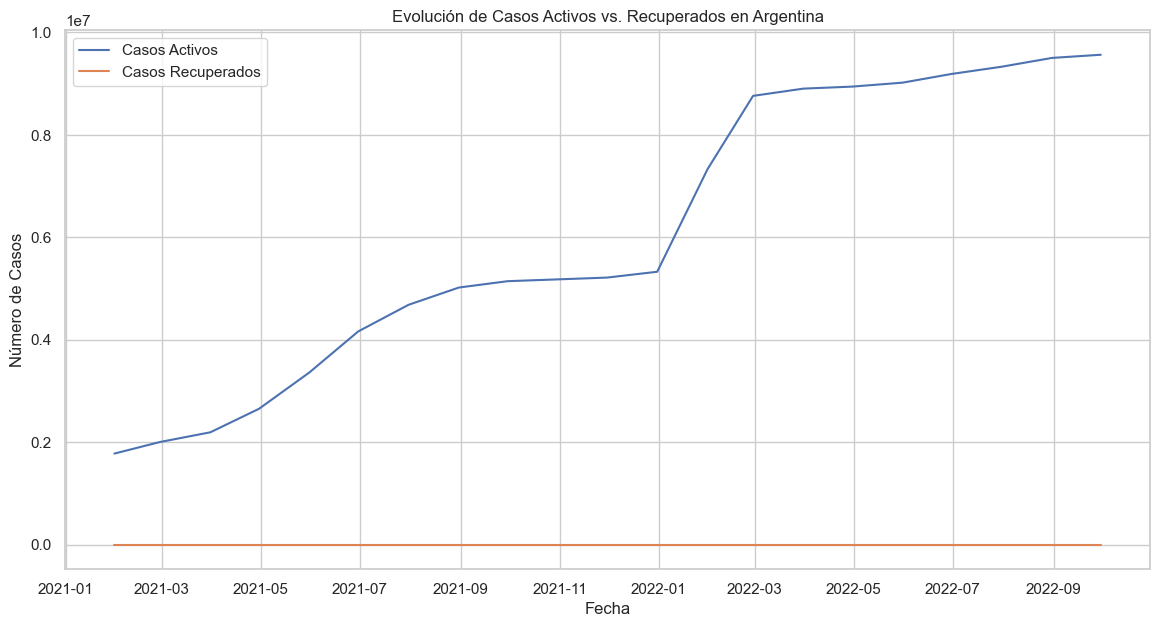

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


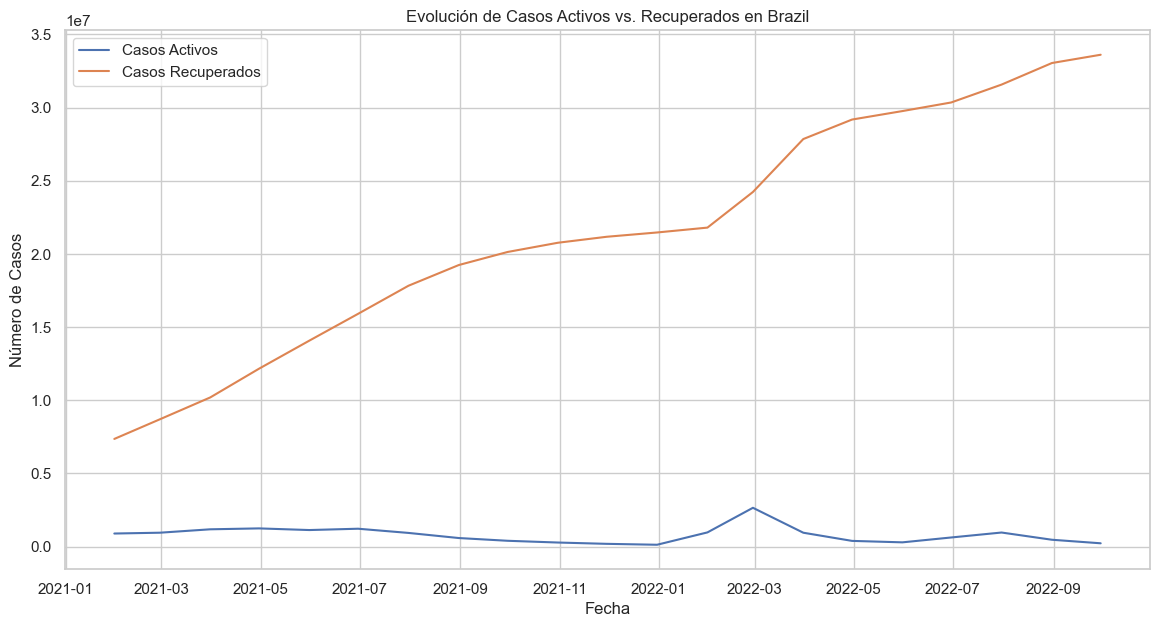

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


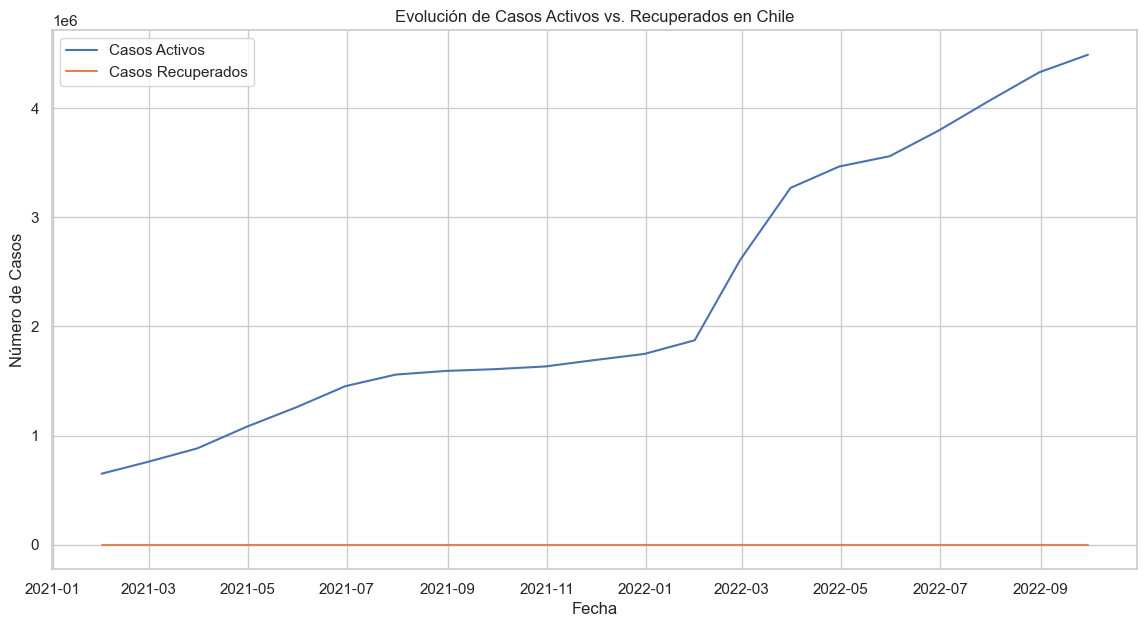

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


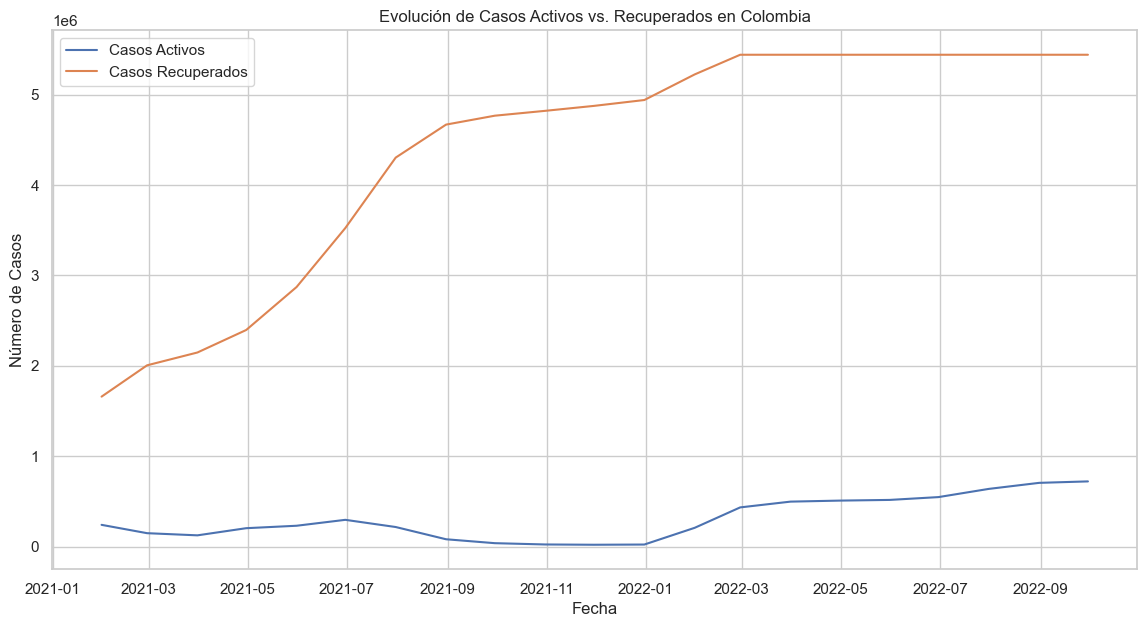

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


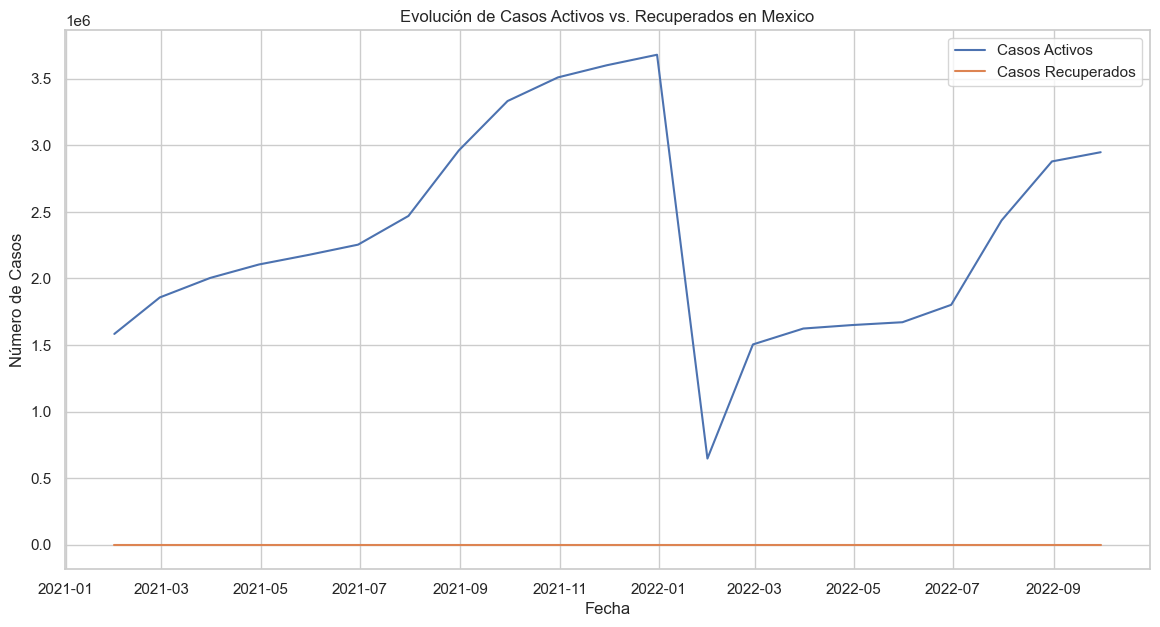

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\933836934.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


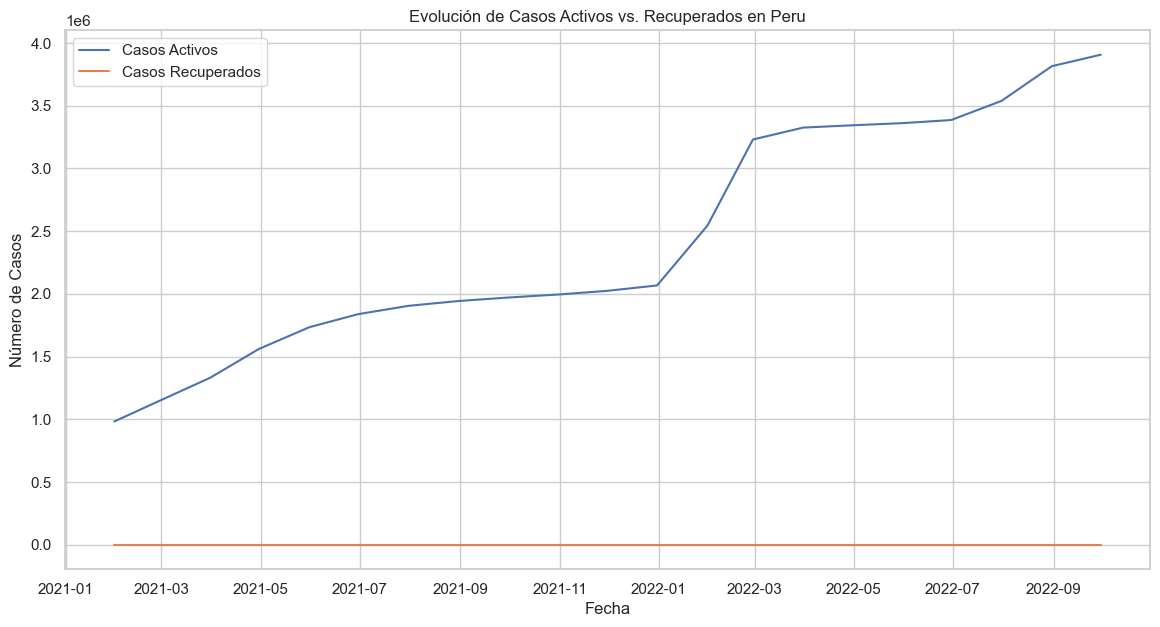

In [69]:
# Crear una copia de los datos filtrados
data = data_filtrada.copy()

# Calcular los casos activos
data['active_cases'] = data['cumulative_confirmed'] - data['cumulative_deceased'] - data['cumulative_recovered']

# Obtener la lista de países únicos
lista_paises = list(data['country_name'].unique())

# Iterar sobre cada país
for pais in lista_paises:
    # Filtrar datos para el país actual
    data_pais = data[data['country_name'] == pais].copy()
    

    
    # Re-samplear y calcular la media mensual
    data_resampled = data_pais.resample('M').mean(numeric_only=True)

    # Crear la figura y los ejes
    plt.figure(figsize=(14, 7))
    
    # Crear las líneas de los gráficos
    sns.lineplot(data=data_resampled, x='date', y='active_cases', label='Casos Activos')
    sns.lineplot(data=data_resampled, x='date', y='cumulative_recovered', label='Casos Recuperados')
    
    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Número de Casos')
    plt.title(f'Evolución de Casos Activos vs. Recuperados en {pais}')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

### Tasa de Crecimiento % general y por Pais

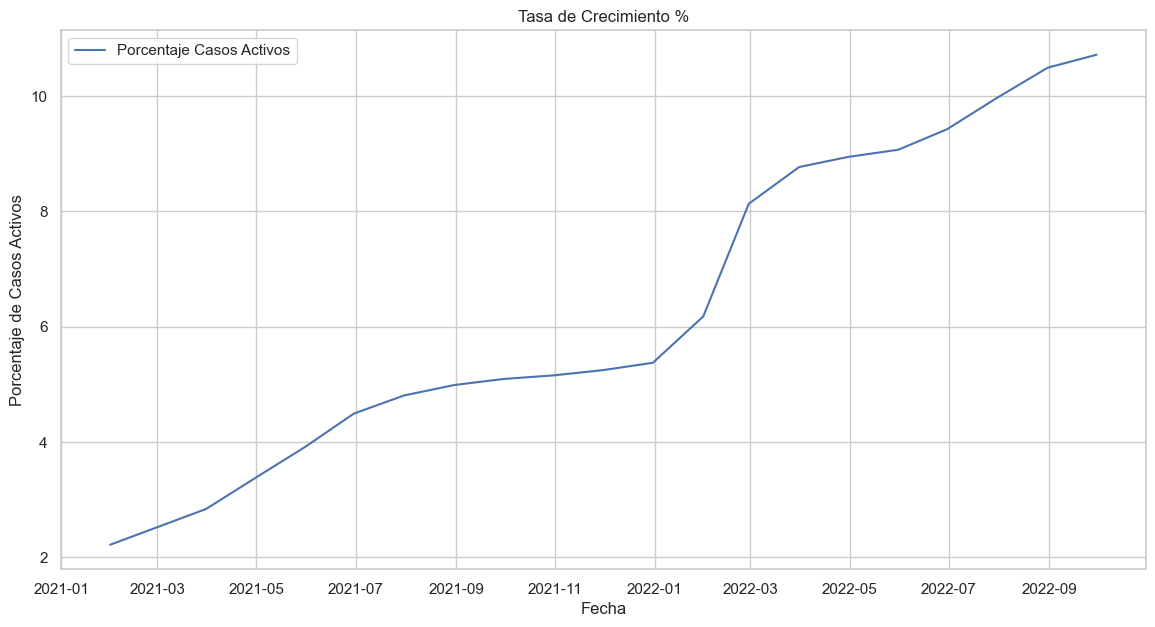

In [70]:
data= data_filtrada.copy()

data['active_cases'] = data['cumulative_confirmed'] - data['cumulative_deceased'] - data['cumulative_recovered']

data['active_cases_porcentage'] = data['active_cases'] / data['population']*100

plt.figure(figsize=(14,7))
        
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='active_cases_porcentage', label = 'Porcentaje Casos Activos')

plt.xlabel('Fecha')
plt.ylabel('Porcentaje de Casos Activos')
plt.title('Tasa de Crecimiento %')
plt.legend()
plt.show()


C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


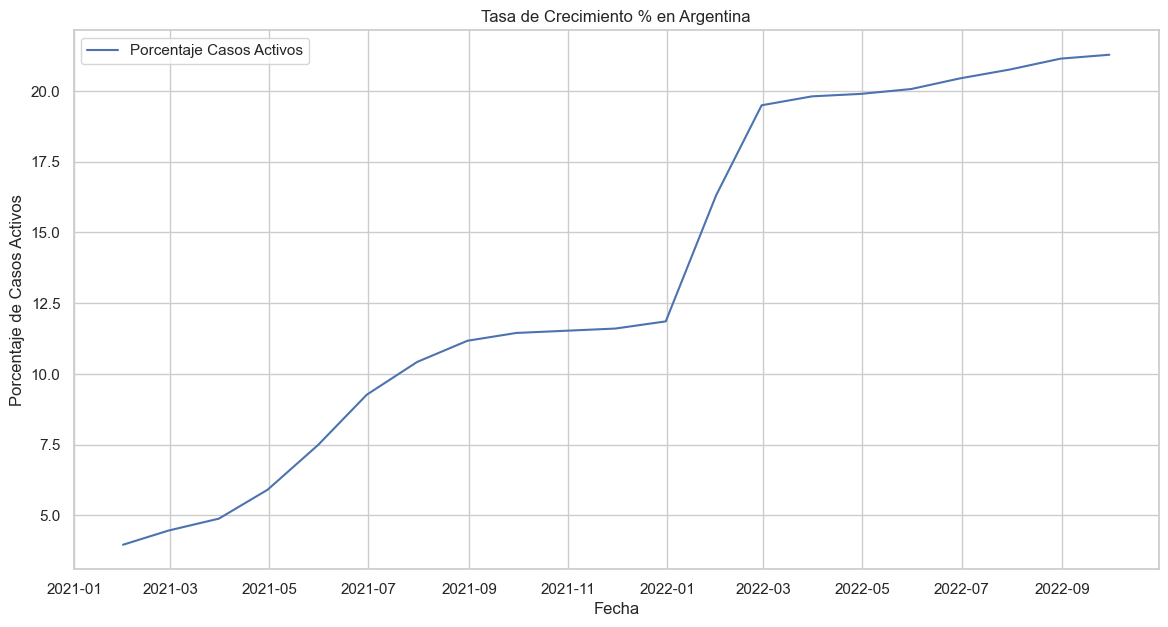

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


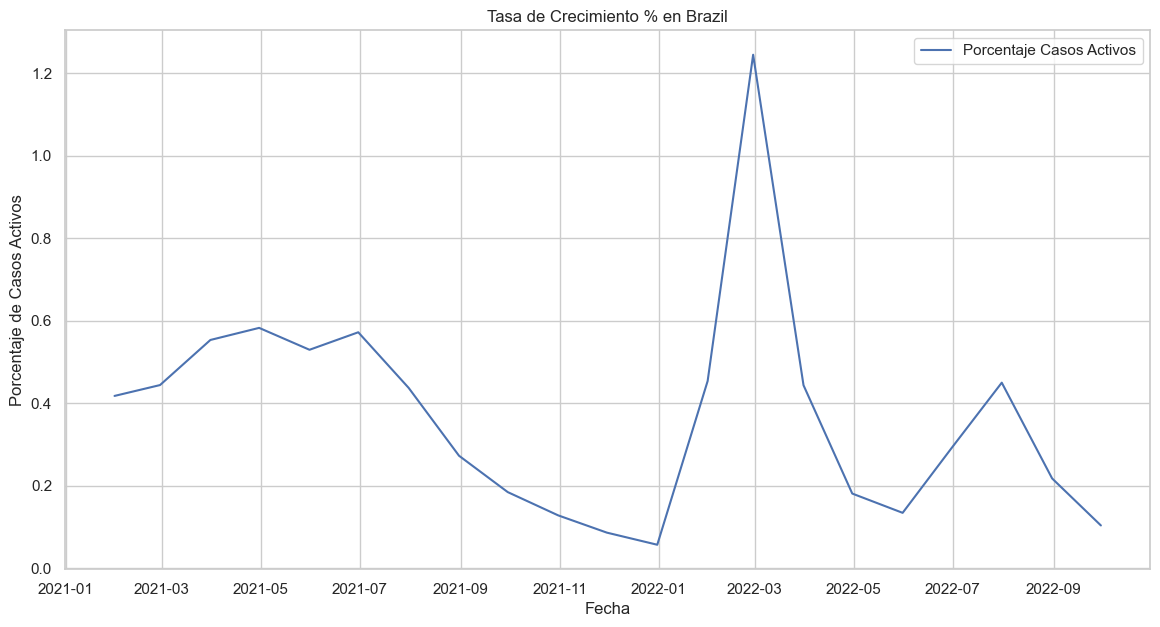

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


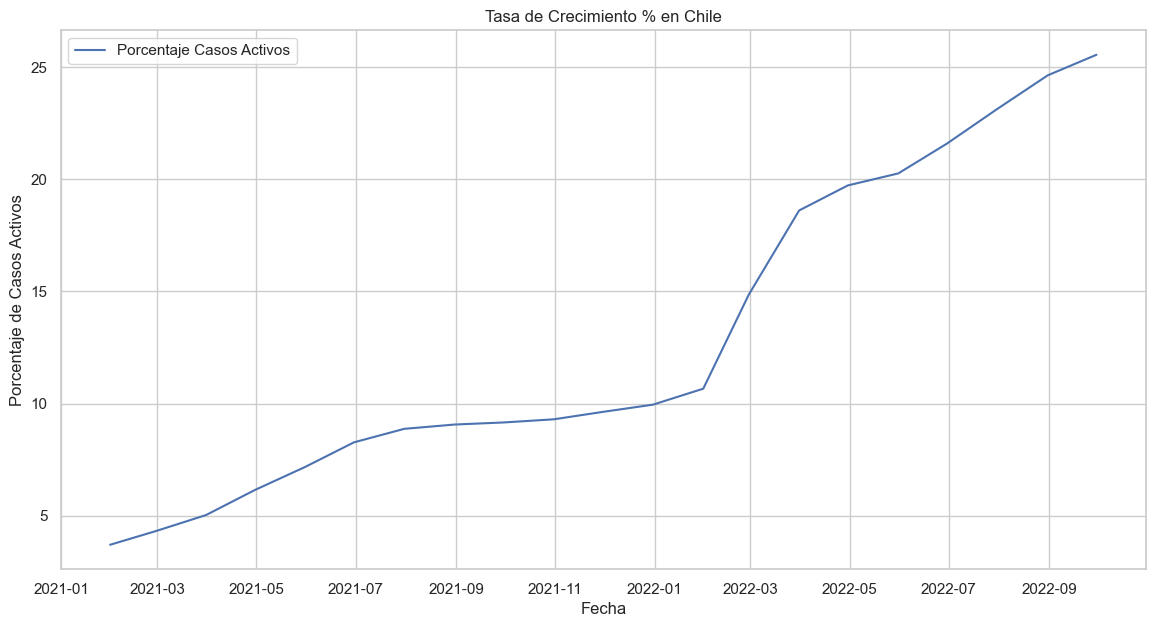

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


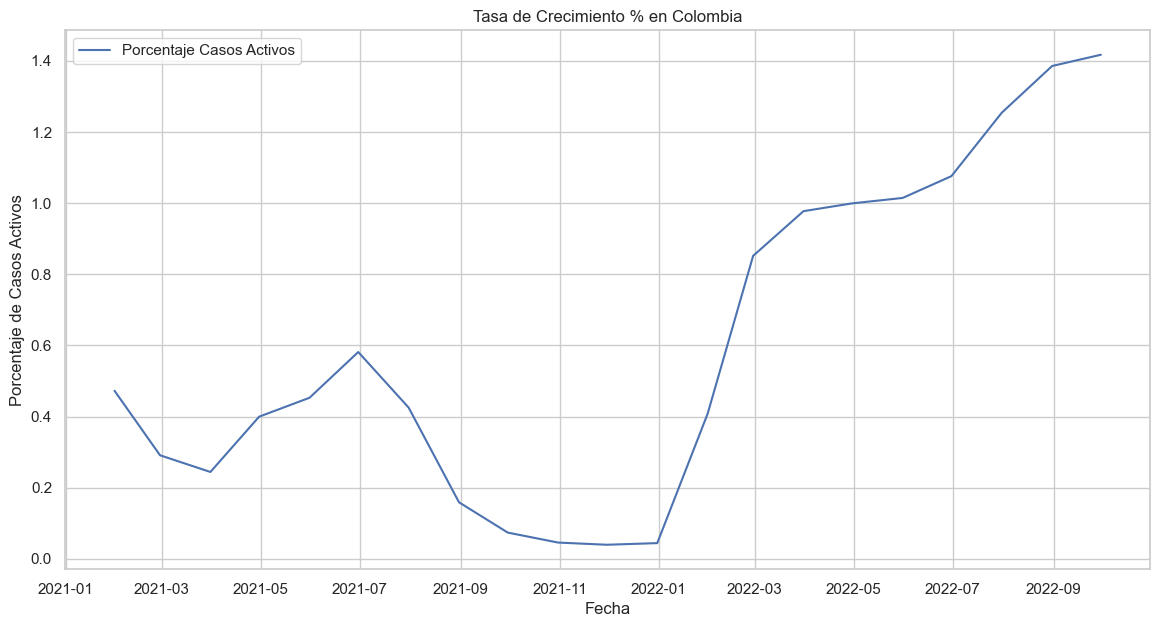

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


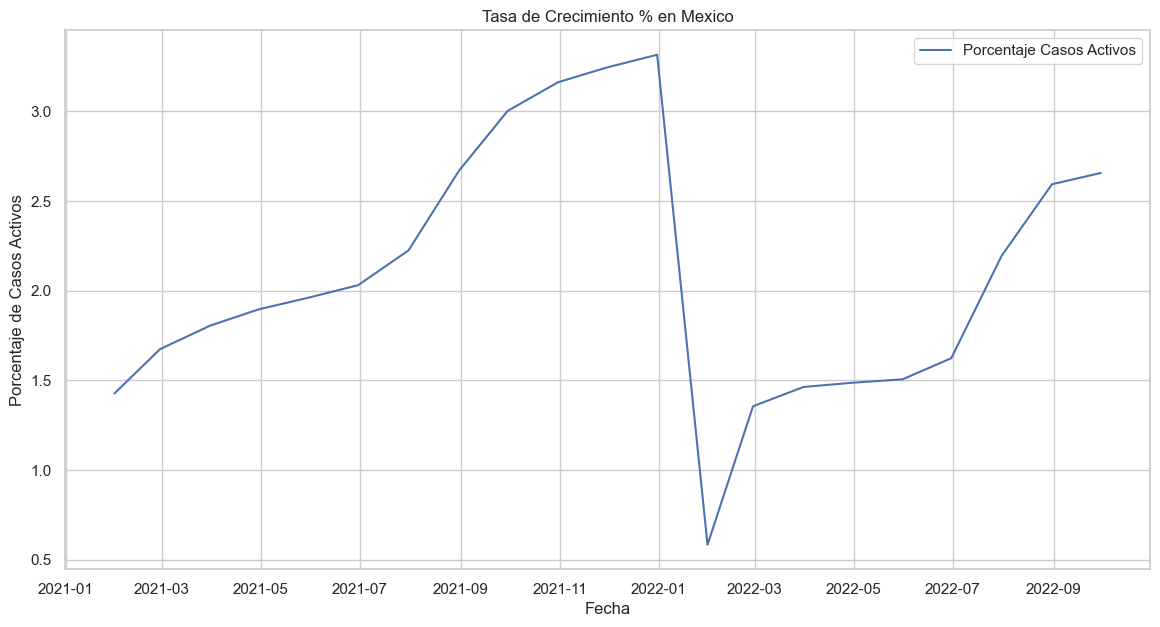

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\2526385396.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data_pais.resample('M').mean(numeric_only=True)


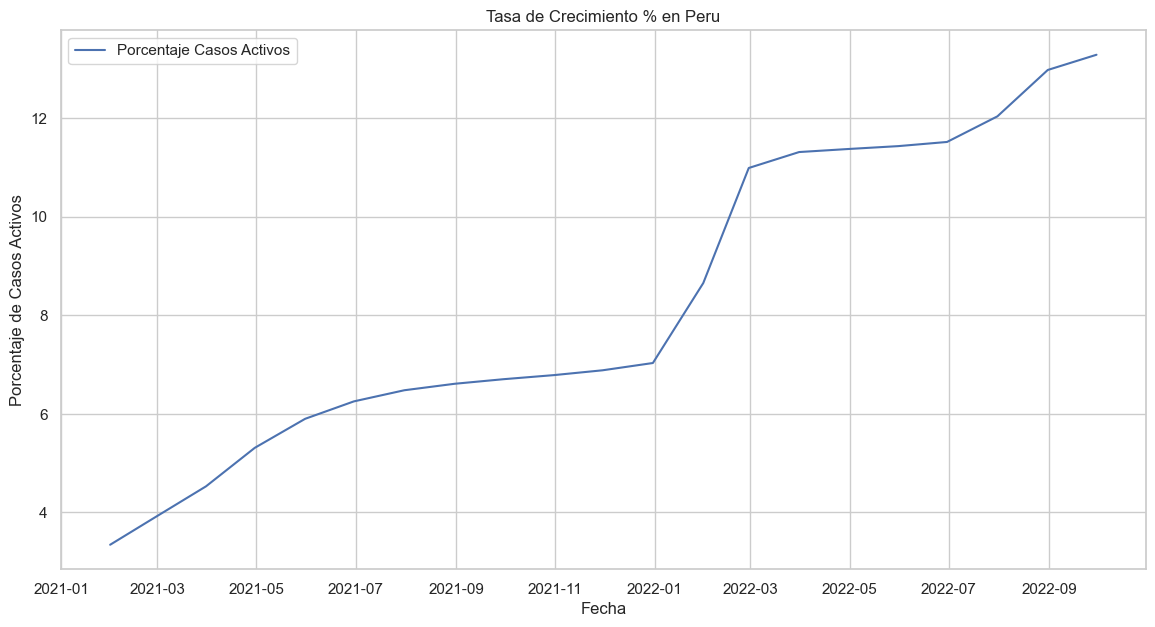

In [71]:
# Crear una copia de los datos filtrados
data = data_filtrada.copy()

# Calcular los casos activos
data['active_cases'] = data['cumulative_confirmed'] - data['cumulative_deceased'] - data['cumulative_recovered']

data['active_cases_porcentage'] = data['active_cases'] / data['population']*100

# Obtener la lista de países únicos
lista_paises = list(data['country_name'].unique())

# Iterar sobre cada país
for pais in lista_paises:
    # Filtrar datos para el país actual
    data_pais = data[data['country_name'] == pais].copy()
    

    
    # Re-samplear y calcular la media mensual
    data_resampled = data_pais.resample('M').mean(numeric_only=True)

    # Crear la figura y los ejes
    plt.figure(figsize=(14, 7))
    
    # Crear las líneas de los gráficos
    sns.lineplot(data=data_resampled, x='date', y='active_cases_porcentage', label='Porcentaje Casos Activos')
    
    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Porcentaje de Casos Activos')
    plt.title(f'Tasa de Crecimiento % en {pais}')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

### Nuevos casos de COVID-19 y Temperatura media 

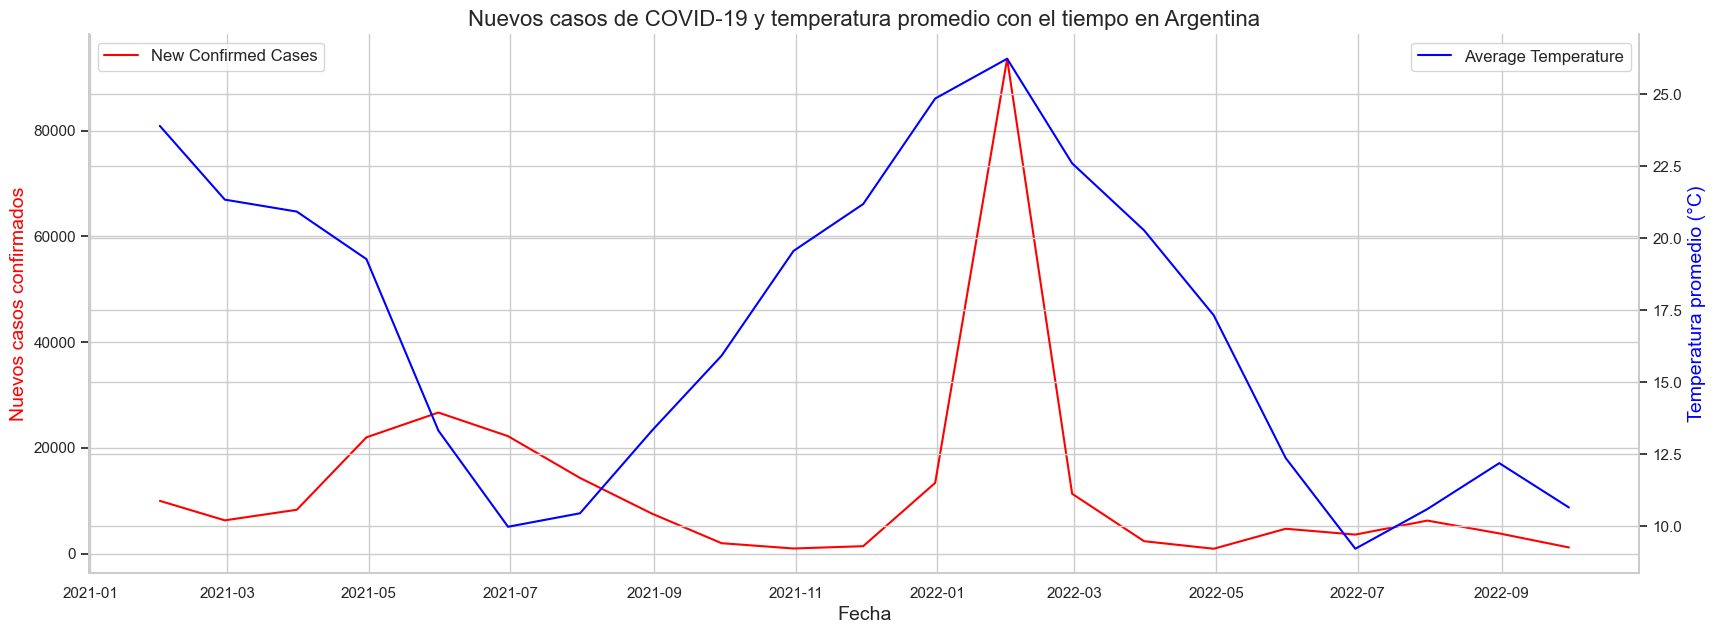

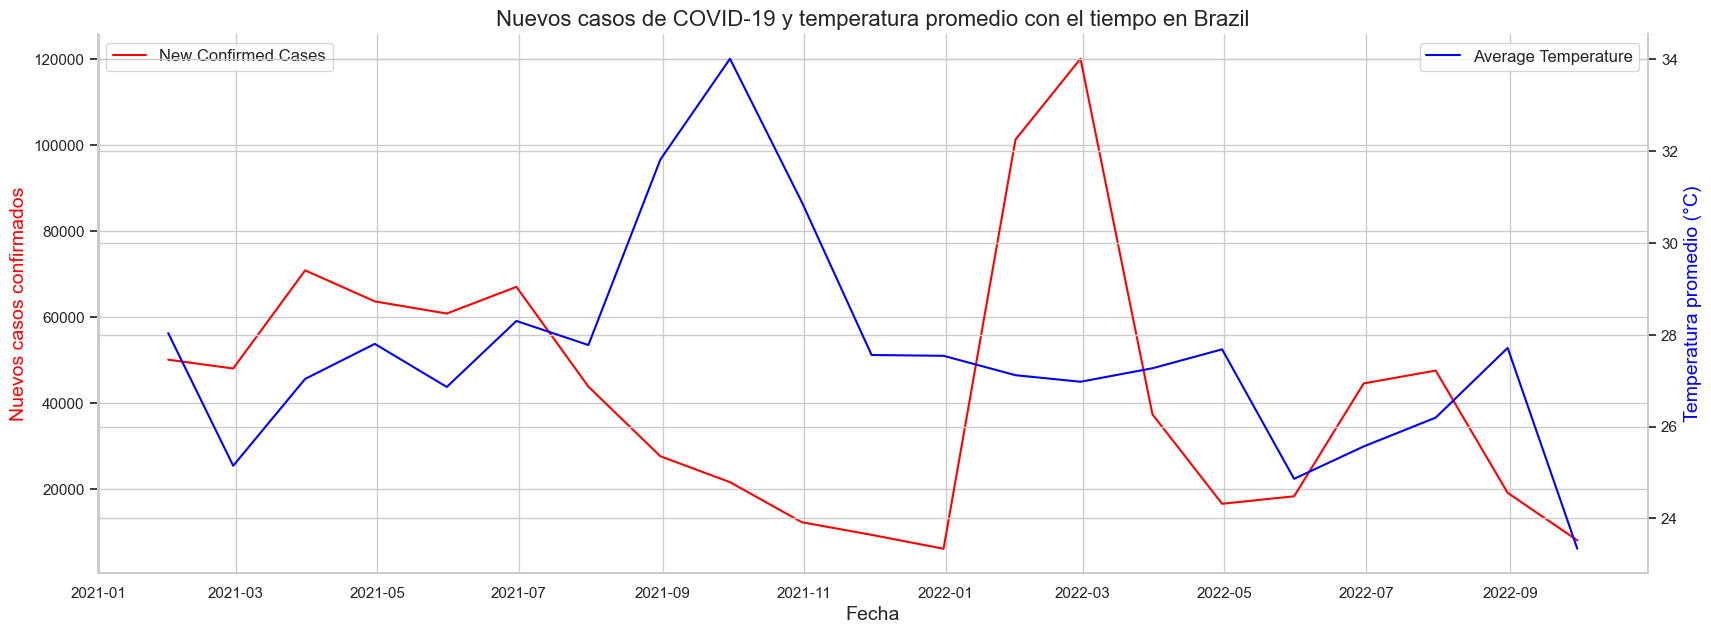

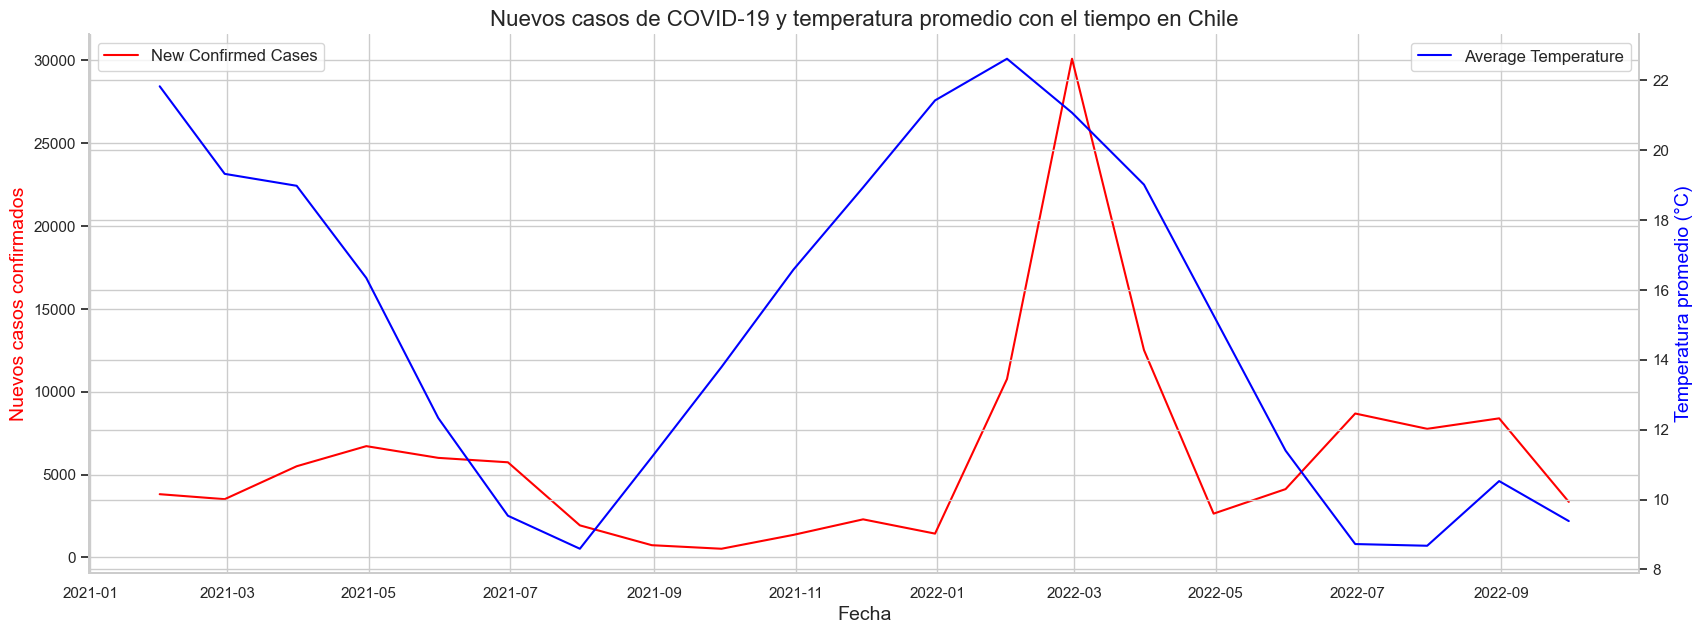

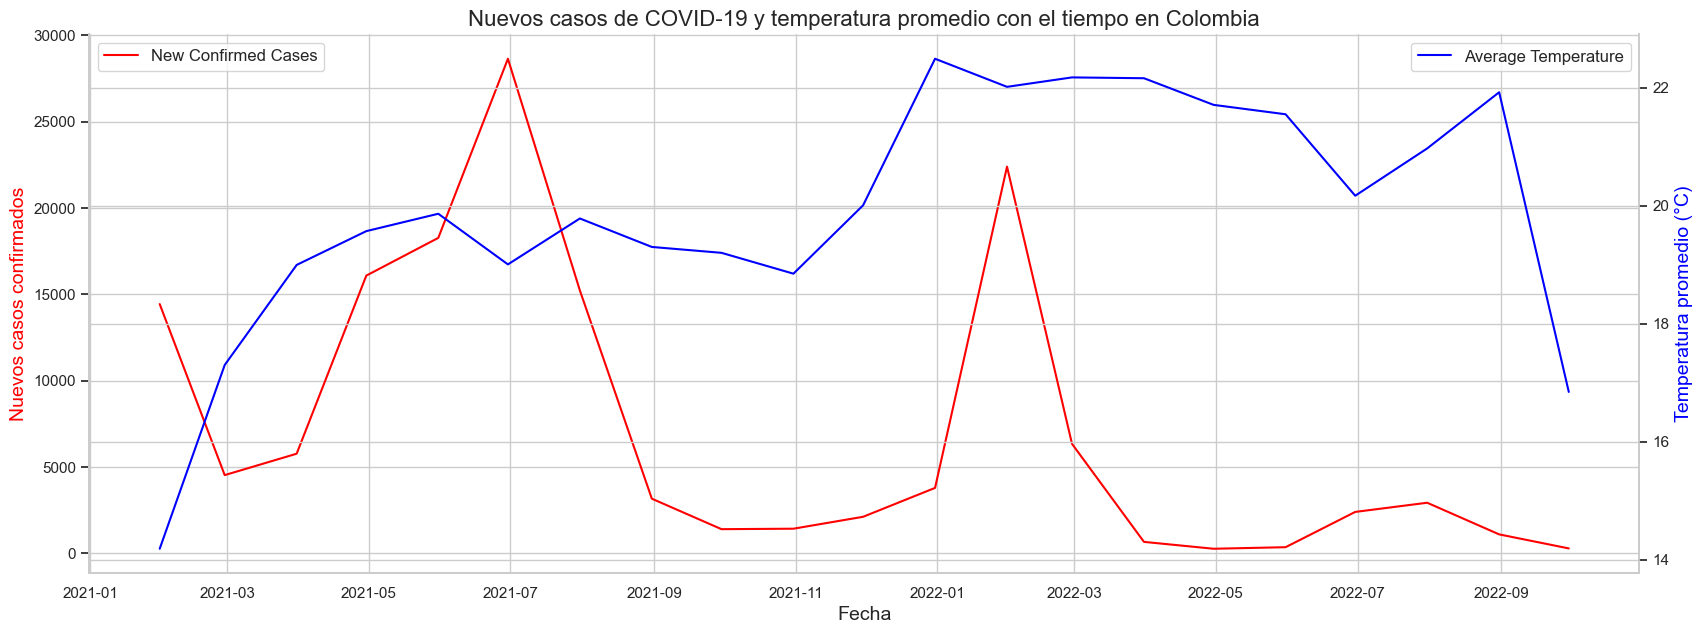

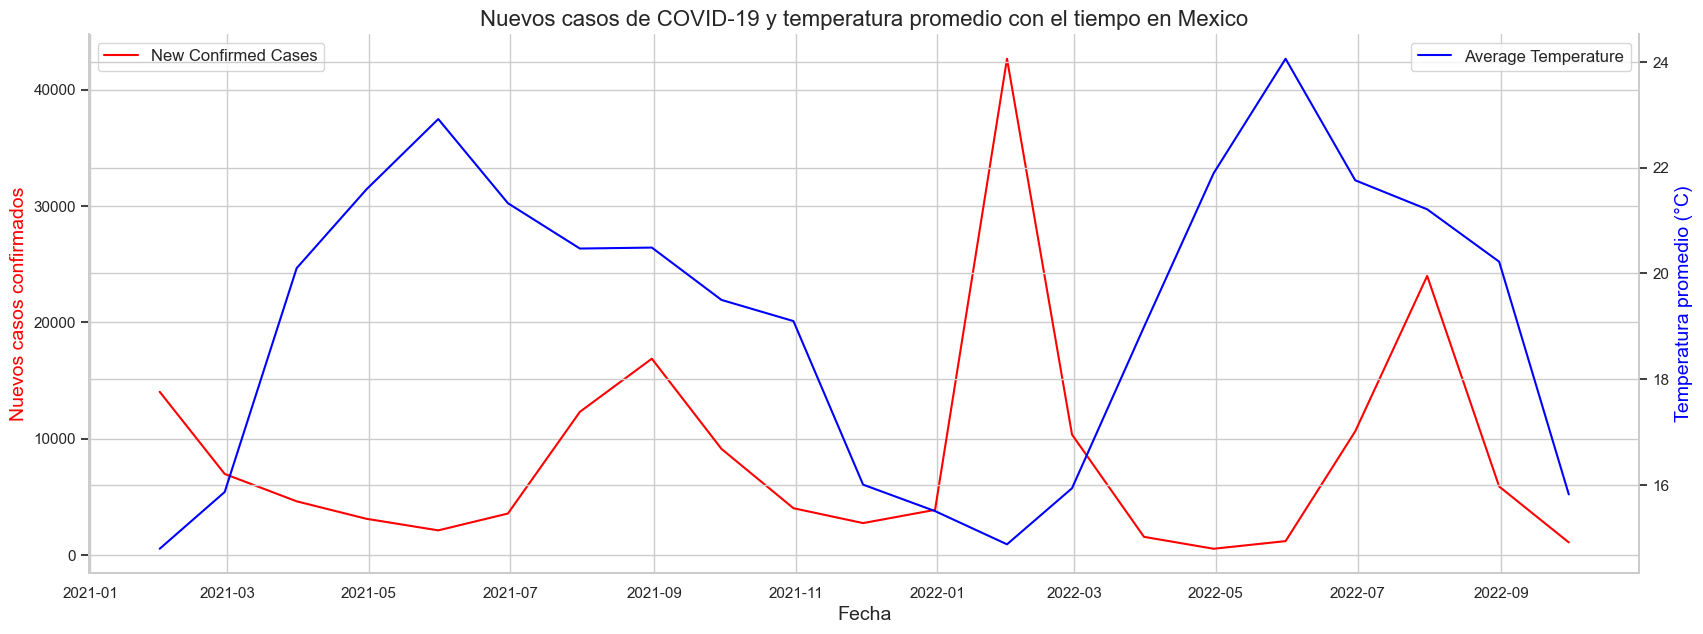

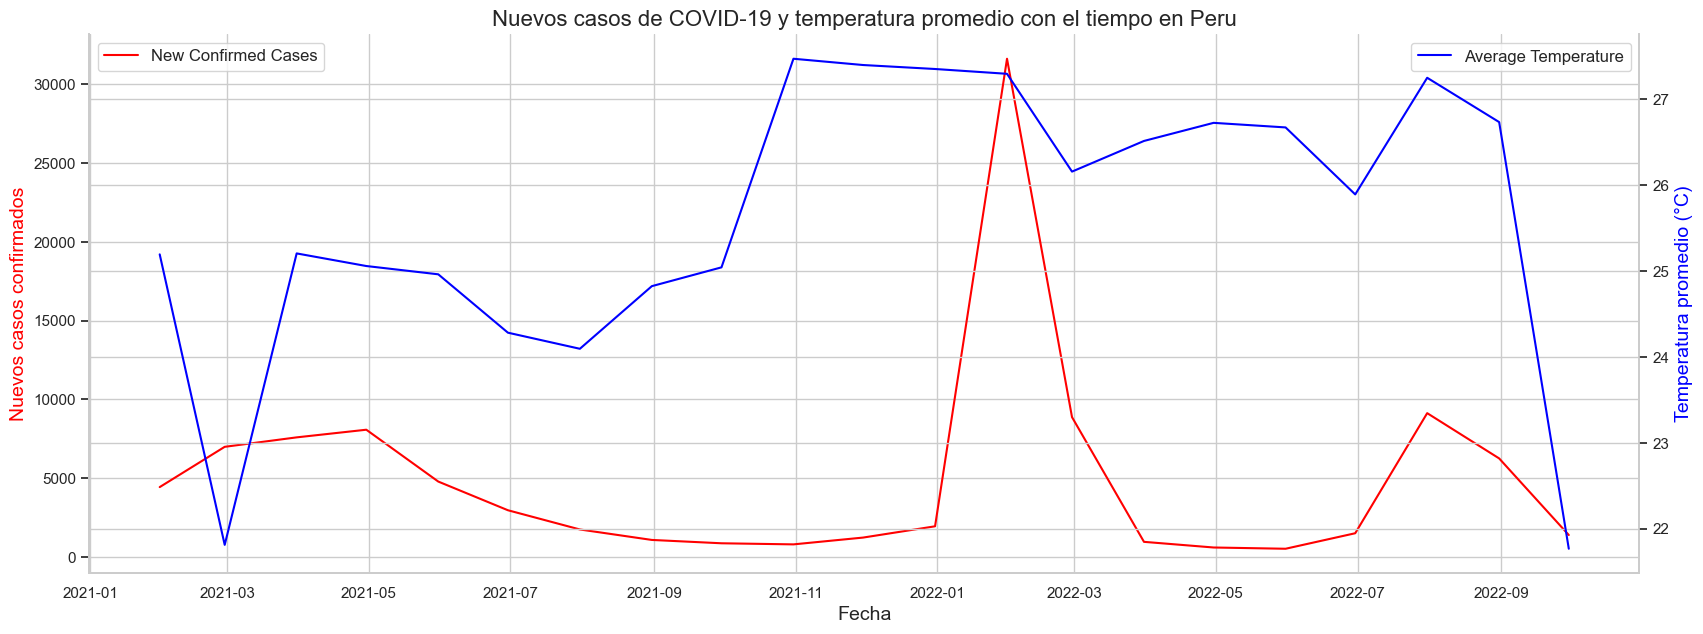

In [72]:


# Configurar el estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Obtener la lista de países únicos
lista_paises = data_filtrada['country_name'].unique()

# Iterar sobre cada país y graficar los datos
for pais in lista_paises:
    fig, ax1 = plt.subplots(figsize=(20, 7))
    ax2 = ax1.twinx()

    # Filtrar los datos para el país actual
    data_pais = data_filtrada[data_filtrada['country_name'] == pais]

    # Resamplear y calcular el promedio
    resampled_data = data_pais.resample('ME').mean(numeric_only=True)
    index = resampled_data.index
    new_cases = resampled_data['new_confirmed']
    average_temperature = resampled_data['average_temperature_celsius']

    # Graficar los datos con seaborn
    sns.lineplot(x=index, y=new_cases, ax=ax1, color='red', label='New Confirmed Cases')
    sns.lineplot(x=index, y=average_temperature, ax=ax2, color='blue', label='Average Temperature')

    # Configurar etiquetas y título
    ax1.set_xlabel('Fecha', fontsize=14)
    ax1.set_ylabel('Nuevos casos confirmados', color='red', fontsize=14)
    ax2.set_ylabel('Temperatura promedio (°C)', color='blue', fontsize=14)
    plt.title(f'Nuevos casos de COVID-19 y temperatura promedio con el tiempo en {pais}', fontsize=16)

    # Configurar leyendas
    ax1.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)

    # Ajustar el estilo de los ejes y el fondo
    sns.despine(fig=fig, right=False, left=False)

    # Mostrar la gráfica
    plt.show()



### Distribución de la Poblacion por Edad en Países con Altas Tasas de Mortalidad por COVID-19

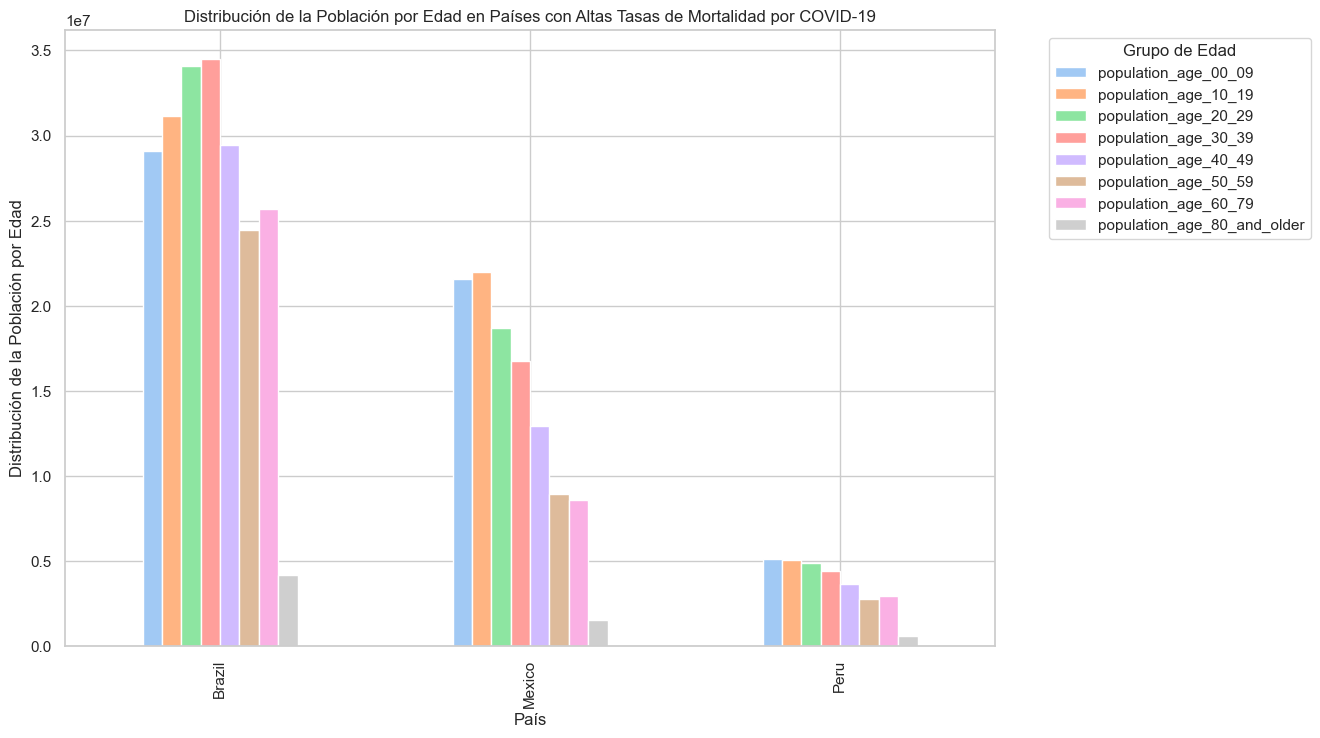

In [73]:
data = data_filtrada
high_mortality_countries = data.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(3).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
              'population_age_40_49', 'population_age_50_59', 'population_age_60_79', 'population_age_80_and_older']


age_distribution = data[data['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()


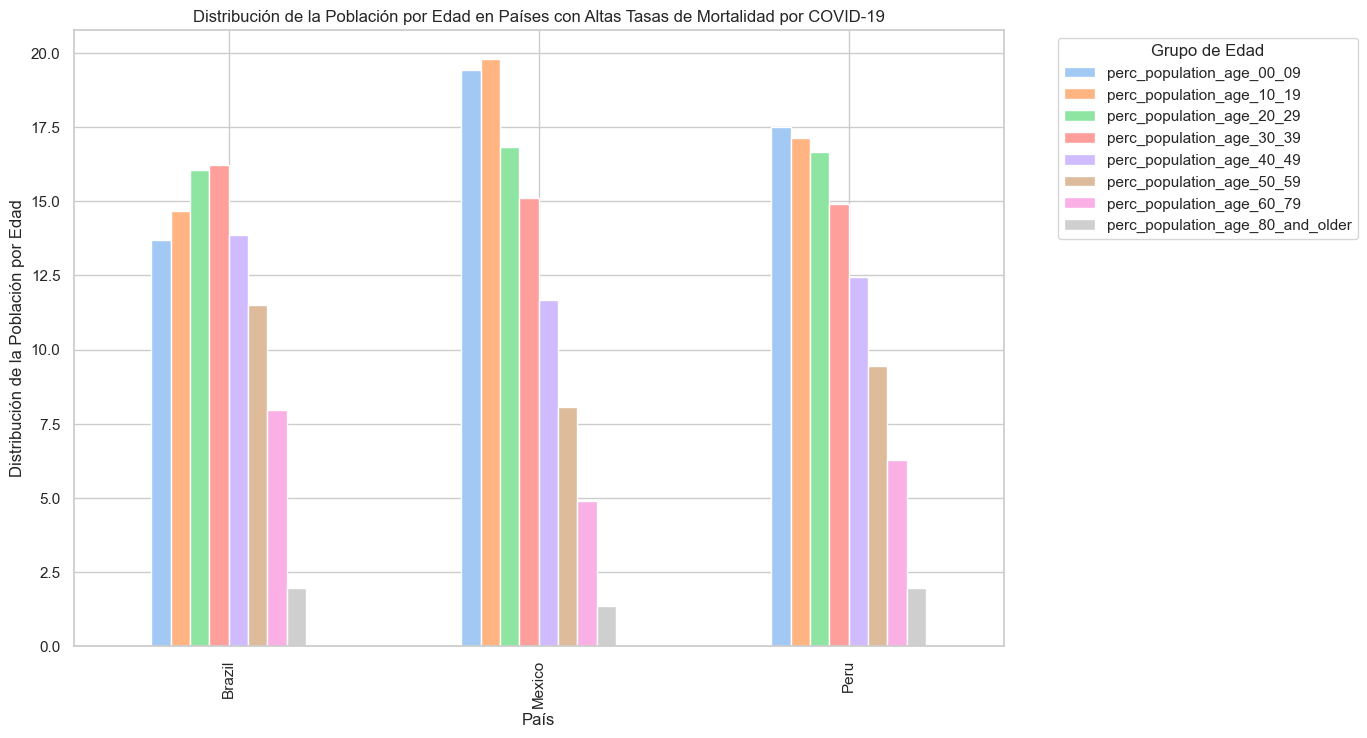

In [74]:
data = data_filtrada
high_mortality_countries = data.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(3).index



data['perc_population_age_00_09'] = data['population_age_00_09']/data['population']*100
data['perc_population_age_10_19'] = data['population_age_10_19']/data['population']*100
data['perc_population_age_20_29'] = data['population_age_20_29']/data['population']*100
data['perc_population_age_30_39'] = data['population_age_30_39']/data['population']*100
data['perc_population_age_40_49'] = data['population_age_40_49']/data['population']*100
data['perc_population_age_50_59'] = data['population_age_50_59']/data['population']*100
data['perc_population_age_60_79'] = data['population_age_60_69']/data['population']*100
data['perc_population_age_80_and_older'] = data['population_age_80_and_older']/data['population']*100

age_groups = ['perc_population_age_00_09', 'perc_population_age_10_19', 'perc_population_age_20_29', 'perc_population_age_30_39', 
              'perc_population_age_40_49', 'perc_population_age_50_59', 'perc_population_age_60_79', 'perc_population_age_80_and_older']



age_distribution_perc = data[data['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution_perc.plot(kind='bar', stacked=False, figsize=(12, 8))
sns.set(style="whitegrid", palette="muted")
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()


### Comparacion de Estrategias de Vacunacion en América Latina

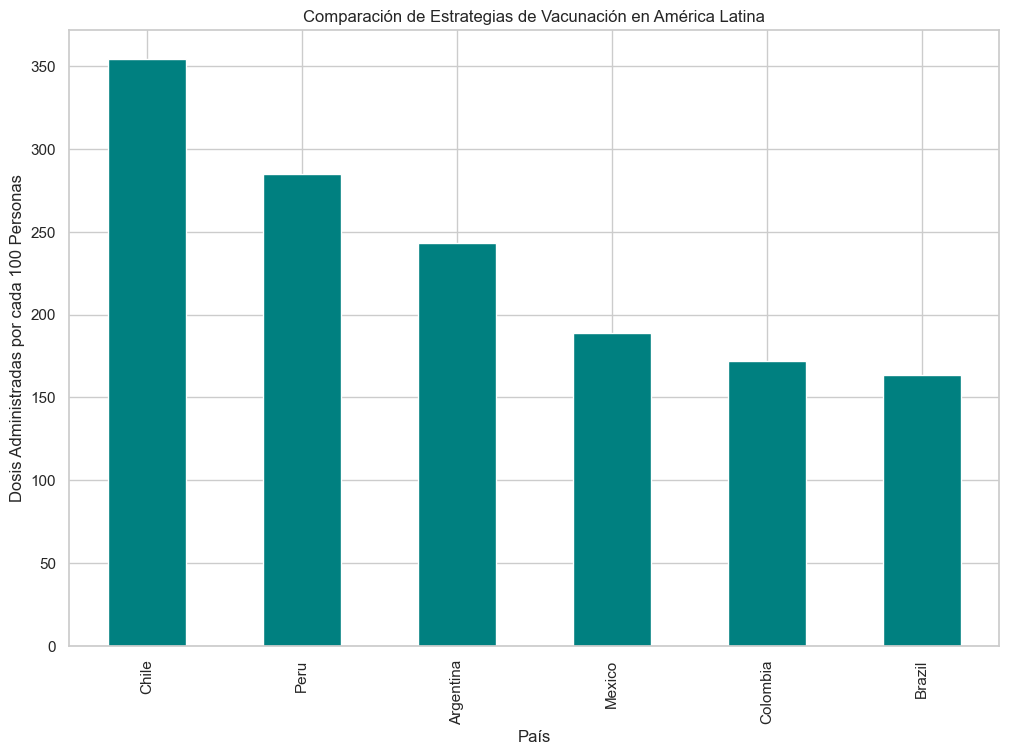

In [75]:
data = data_filtrada.copy()


vaccination_strategy = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data.groupby('country_name')['population'].max() *100

vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()


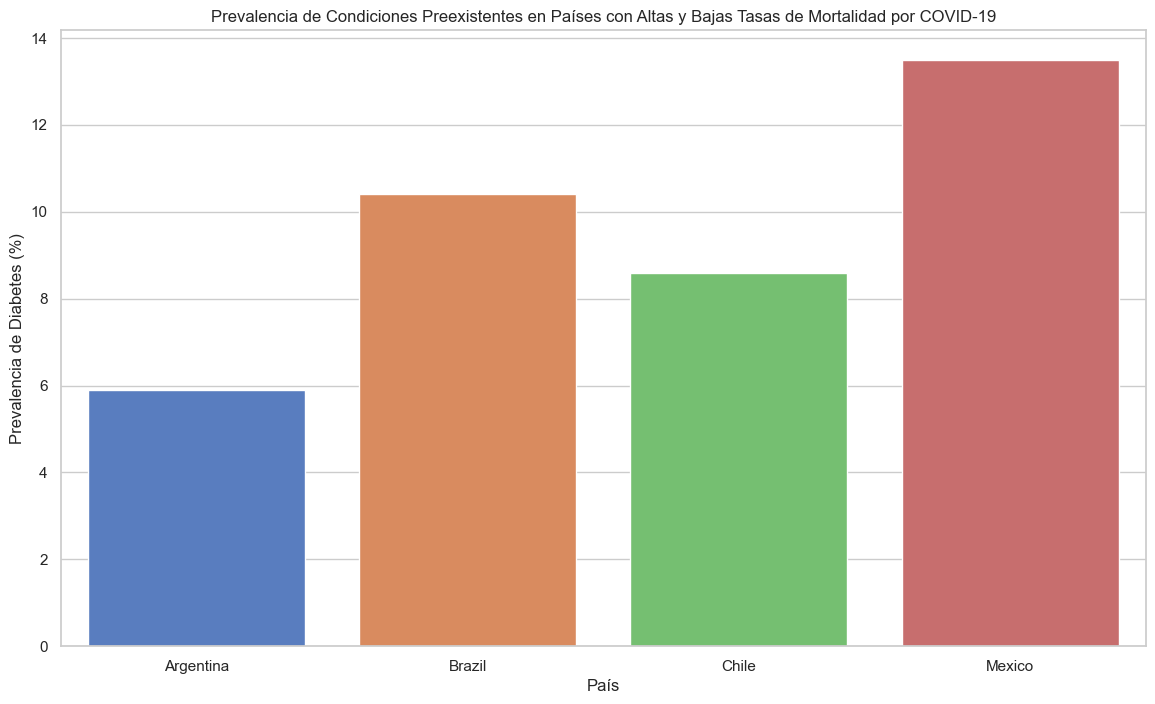

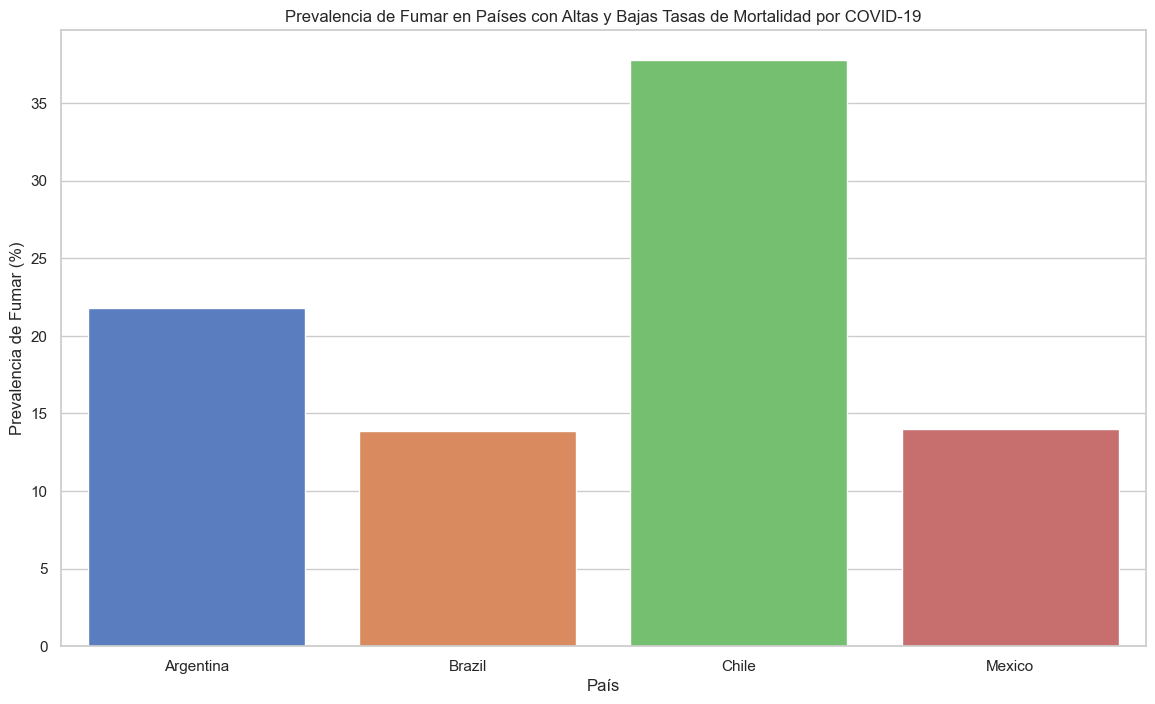

In [76]:
# Prevalencia de diabetes
data = data_filtrada.copy()


top_countries = data.groupby('country_name')['cumulative_deceased'].max().nlargest(2).index
bottom_countries = data.groupby('country_name')['cumulative_deceased'].max().nsmallest(2).index
conditions_data = data[data['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Prevalencia de fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


### Subset de Correlaciones

In [77]:
data.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

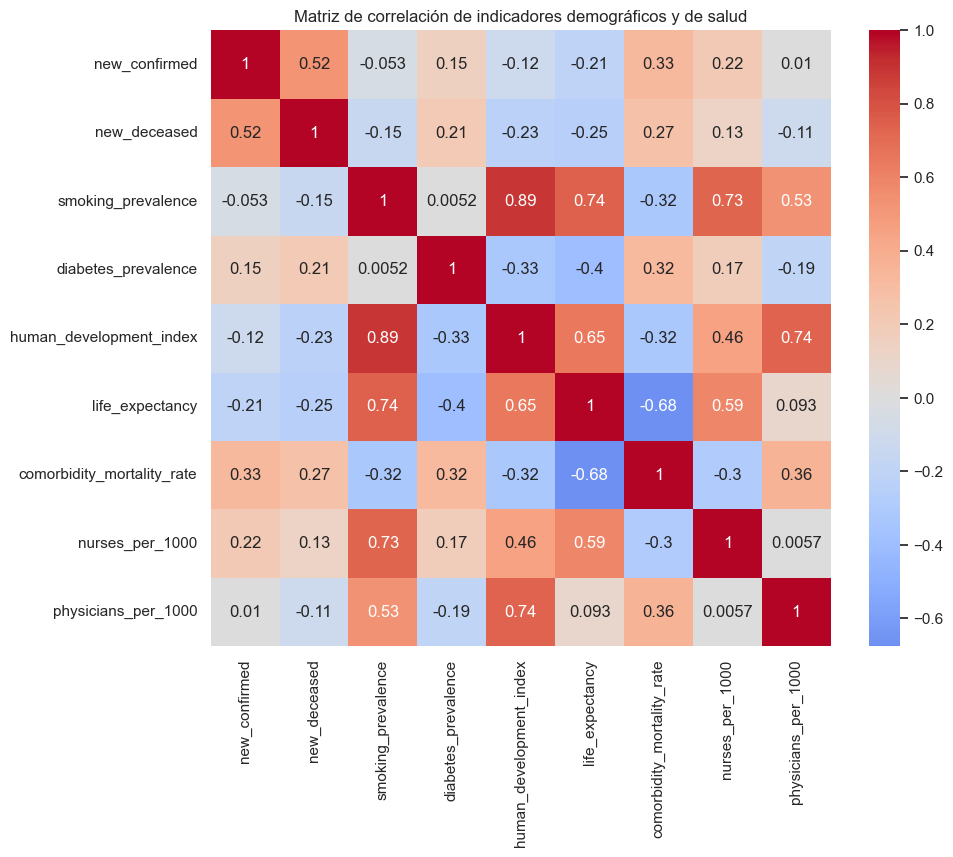

In [78]:
# Selecting a subset of columns for correlation analysis

data = data_filtrada

columns = ['new_confirmed', 'new_deceased','smoking_prevalence', 'diabetes_prevalence', 'human_development_index','life_expectancy','comorbidity_mortality_rate','nurses_per_1000',
       'physicians_per_1000']
correlation_matrix = data[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()


Como podemos ver en el la matriz no hay una relación directa entre la cantidad de doctores y enfermeras con los nuevos fallecidos o los nuevos confirmados


### Comparacion de la tasa de letalidad entre los Paises latinoamericanos

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_17088\1793142926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatality_rates.index, y=fatality_rates.values, palette="magma")


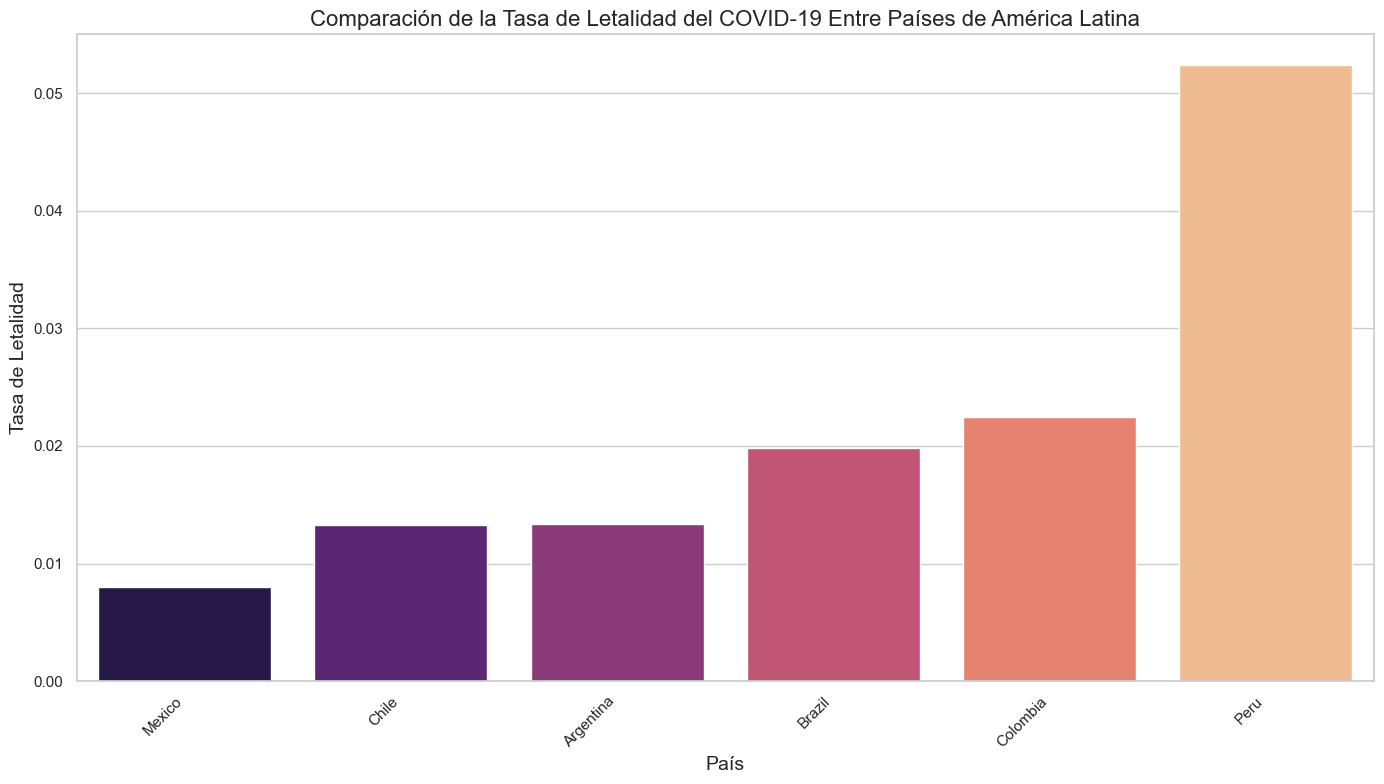

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la tasa de letalidad por país
data = data_filtrada.copy()
data['case_fatality_rate'] = data['cumulative_deceased'] / data['cumulative_confirmed']
fatality_rates = data.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=fatality_rates.index, y=fatality_rates.values, palette="magma")

# Configurar los ejes y el título del gráfico
plt.xlabel('País', fontsize=14)
plt.ylabel('Tasa de Letalidad', fontsize=14)
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La tasa de letalidad en Peru fue siginificativamente peor que en los demas países latinoamericanos 

# Extra credit


In [4]:
# Mapa para la distribución de casos confirmados, muertes, vacunas y recuperados

import numpy as np
import pandas as pd

import folium
from folium.plugins import HeatMap

data_filtrada = pd.read_csv('data_avance1_.csv', sep=',', parse_dates=['date'])
# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_filtrada[columns].dropna()

# Creamos un mapa centrado en América Latina
mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
mapa.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
mapa.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
mapa.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
mapa.add_child(heat_map_recovered)

# Guardar el mapa
mapa.save('mapa.html')
mapa

C:\Users\PC Daniel\AppData\Local\Temp\ipykernel_4472\27030621.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


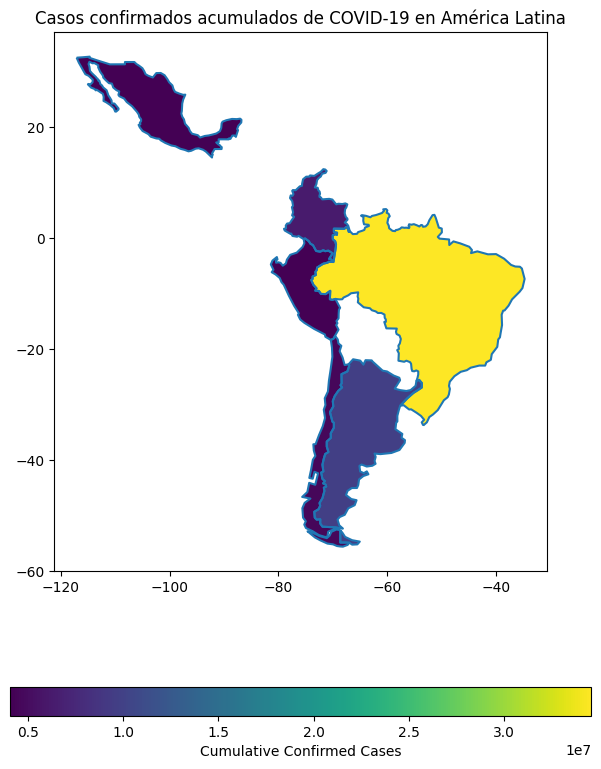

In [7]:
# Mapa para ver la distribución de casos confirmados en Latinoamérica por país
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


data_filtrada = pd.read_csv('data_avance1_.csv', sep=',', parse_dates=['date'])
# Cargar el archivo geoespacial de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar para que solo queden los países de Latinoamérica
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world[(world.name == "Argentina") | (world.name == "Chile") | (world.name == "Colombia") | 
              (world.name == "Mexico") | (world.name == "Peru") | (world.name == "Brazil")]

# Renombrar la columna 'name' a 'country_name'
world = world.rename(columns={"name": "country_name"})

# Hacer el merge con los datos de COVID-19
world = world.merge(data_filtrada.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Crear el plot del mapa con los datos de casos confirmados acumulados
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5})

# Añadir título y mostrar el gráfico
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()